# Importing Libraries for Depression Detection 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sb


# Reading Dataset

In [2]:
data = pd.read_csv('EEG.machinelearing_data_BRMH.csv')
data.head()


,no.,sex,age,eeg.date,education,IQ,main.disorder,specific.disorder,AB.A.delta.a.FP1,AB.A.delta.b.FP2,...,COH.F.gamma.o.Pz.p.P4,COH.F.gamma.o.Pz.q.T6,COH.F.gamma.o.Pz.r.O1,COH.F.gamma.o.Pz.s.O2,COH.F.gamma.p.P4.q.T6,COH.F.gamma.p.P4.r.O1,COH.F.gamma.p.P4.s.O2,COH.F.gamma.q.T6.r.O1,COH.F.gamma.q.T6.s.O2,COH.F.gamma.r.O1.s.O2
0,1,M,57.0,2012.8.30,NaN,NaN,Addictive disorder,Alcohol use disorder,35.998557,21.717375,...,55.989192,16.739679,23.452271,45.678820,30.167520,16.918761,48.850427,9.422630,34.507082,28.613029
1,2,M,37.0,2012.9.6,6.0,120.0,Addictive disorder,Alcohol use disorder,13.425118,11.002916,...,45.595619,17.510824,26.777368,28.201062,57.108861,32.375401,60.351749,13.900981,57.831848,43.463261
2,3,M,32.0,2012.9.10,16.0,113.0,Addictive disorder,Alcohol use disorder,29.941780,27.544684,...,99.475453,70.654171,39.131547,69.920996,71.063644,38.534505,69.908764,27.180532,64.803155,31.485799
3,4,M,35.0,2012.10.8,18.0,126.0,Addictive disorder,Alcohol use disorder,21.496226,21.846832,...,59.986561,63.822201,36.478254,47.117006,84.658376,24.724096,50.299349,35.319695,79.822944,41.141873
4,5,M,36.0,2012.10.18,16.0,112.0,Addictive disorder,Alcohol use disorder,37.775667,33.607679,...,61.462720,59.166097,51.465531,58.635415,80.685608,62.138436,75.888749,61.003944,87.455509,70.531662


<iframe src="https://www.kaggle.com/embed/lazygene/visualising-pre-processed-eeg-data?cellIds=5&kernelSessionId=106172334" height="300" style="margin: 0 auto; width: 100%; max-width: 950px;" frameborder="0" scrolling="auto" title="Visualising pre-processed EEG data"></iframe>

# Step-1: Exploratory Data Analysis (EDA)

In [3]:

print("Data Shape:",data.shape)


Data Shape: (945, 1149)


In [4]:
df=data

In [5]:
# function to rename
def reformat_name(name):
    '''
    reformat from XX.X.band.x.channel to band.channel or 
    COH.X.band.x.channel1.x.channel2 to COH.band.channel1.channel2
    '''
    splitted = name.split(sep='.')
    if len(splitted) < 5:
        return name
    if splitted[0] != 'COH':
        result = f'{splitted[2]}.{splitted[4]}'
    else:
        result = f'{splitted[0]}.{splitted[2]}.{splitted[4]}.{splitted[6]}'
    return result
# rename columns
df.rename(reformat_name, axis=1, inplace=True)
# show df
df

,no.,sex,age,eeg.date,education,IQ,main.disorder,specific.disorder,delta.FP1,delta.FP2,...,COH.gamma.Pz.P4,COH.gamma.Pz.T6,COH.gamma.Pz.O1,COH.gamma.Pz.O2,COH.gamma.P4.T6,COH.gamma.P4.O1,COH.gamma.P4.O2,COH.gamma.T6.O1,COH.gamma.T6.O2,COH.gamma.O1.O2
0,1,M,57.0,2012.8.30,NaN,NaN,Addictive disorder,Alcohol use disorder,35.998557,21.717375,...,55.989192,16.739679,23.452271,45.678820,30.167520,16.918761,48.850427,9.422630,34.507082,28.613029
1,2,M,37.0,2012.9.6,6.0,120.0,Addictive disorder,Alcohol use disorder,13.425118,11.002916,...,45.595619,17.510824,26.777368,28.201062,57.108861,32.375401,60.351749,13.900981,57.831848,43.463261
2,3,M,32.0,2012.9.10,16.0,113.0,Addictive disorder,Alcohol use disorder,29.941780,27.544684,...,99.475453,70.654171,39.131547,69.920996,71.063644,38.534505,69.908764,27.180532,64.803155,31.485799
3,4,M,35.0,2012.10.8,18.0,126.0,Addictive disorder,Alcohol use disorder,21.496226,21.846832,...,59.986561,63.822201,36.478254,47.117006,84.658376,24.724096,50.299349,35.319695,79.822944,41.141873
4,5,M,36.0,2012.10.18,16.0,112.0,Addictive disorder,Alcohol use disorder,37.775667,33.607679,...,61.462720,59.166097,51.465531,58.635415,80.685608,62.138436,75.888749,61.003944,87.455509,70.531662
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
940,941,M,22.0,2014.8.28,13.0,116.0,Healthy control,Healthy control,41.851823,36.771496,...,82.905657,34.850706,63.970519,63.982003,51.244725,62.203684,62.062237,31.013031,31.183413,98.325230
941,942,M,26.0,2014.9.19,13.0,118.0,Healthy control,Healthy control,18.986856,19.401387,...,65.917918,66.700117,44.756285,49.787513,98.905995,54.021304,93.902401,52.740396,92.807331,56.320868
942,943,M,26.0,2014.9.27,16.0,113.0,Healthy control,Healthy control,28.781317,32.369230,...,61.040959,27.632209,45.552852,33.638817,46.690983,19.382928,41.050717,7.045821,41.962451,19.092111
943,944,M,24.0,2014.9.20,13.0,107.0,Healthy control,Healthy control,19.929100,25.196375,...,99.113664,48.328934,41.248470,28.192238,48.665743,42.007147,28.735945,27.176500,27.529522,20.028446


# Electrode Positions

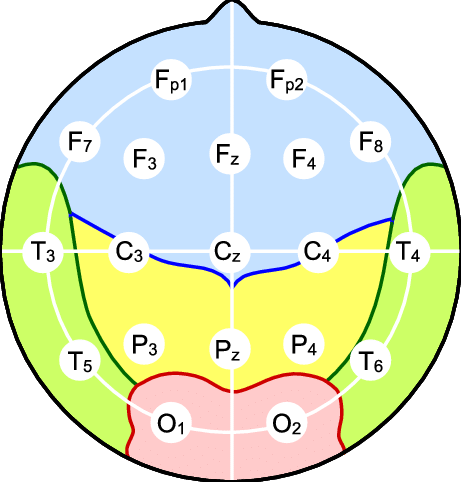

# Visualization 

<h6>Power Spectral Density (PSD) </h6>

In [6]:
# # QEEG PSD (power spectrum density) - absolute power value in each frequency band
# import seaborn as sns
# df=data
# mis = df.isna().sum()
# sep_col = mis[mis == df.shape[0]].index[0]
# sep_col
# # Power Spectral Density (PSD)

# psd_cols = df.loc[:, 'delta.FP1':sep_col].drop(sep_col, axis=1).columns
# # Create DataFrame for visualisation
# psd_long = df.melt(id_vars='no.', value_vars=psd_cols, var_name='psd')
# sns.displot(data=psd_long, kind='hist', x='value', col='psd', col_wrap=10, common_bins=False, facet_kws={'sharey':False, 'sharex': False})
# plt.show()

<h6> FC (functional connectivity) </h6>

In [7]:
# # QEEG FC (functional connectivity) - coherence for each band and channel
# fc_cols = df.loc[:, sep_col:'COH.gamma.O1.O2'].drop(sep_col, axis=1).columns
# fc_long = df.melt(id_vars='no.', value_vars=psd_cols, var_name='fc')
# sns.displot(data=fc_long, kind='hist', x='value', col='fc', col_wrap=10, common_bins=False, facet_kws={'sharey':False, 'sharex': False})
# plt.show()

Depressive disorder    199
Healthy control         95
Name: specific.disorder, dtype: int64


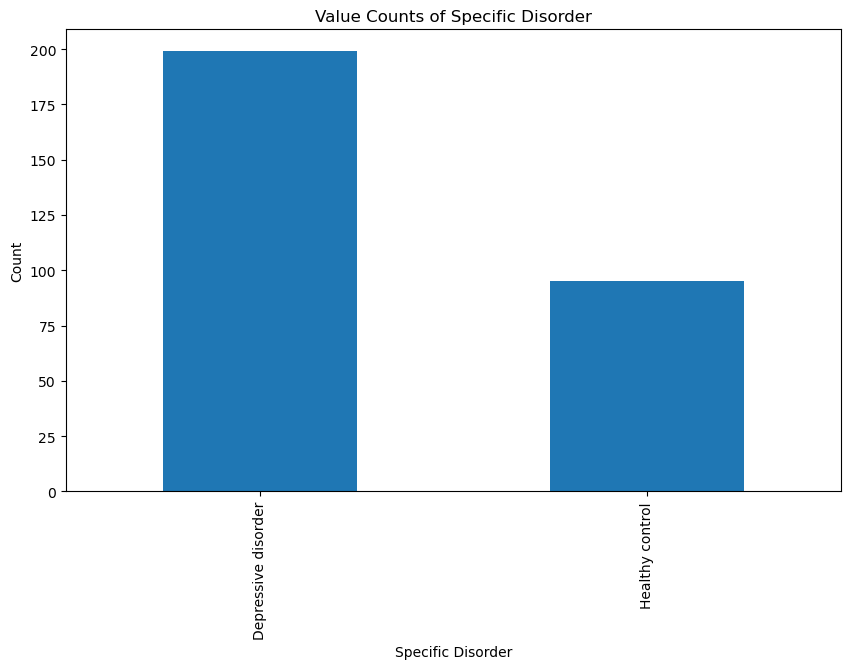

In [8]:
measureData=data[data['specific.disorder'].isin(['Depressive disorder', 'Healthy control'])]

value_counts = measureData['specific.disorder'].value_counts()

# Print the value counts
print(value_counts)

# Plot the value counts as a bar chart
plt.figure(figsize=(10, 6))  # Set the size of the figure
value_counts.plot(kind='bar')  # Create a bar chart
plt.xlabel('Specific Disorder')  # Set the x-axis label
plt.ylabel('Count')  # Set the y-axis label
plt.title('Value Counts of Specific Disorder')  # Set the title of the plot
plt.show()  

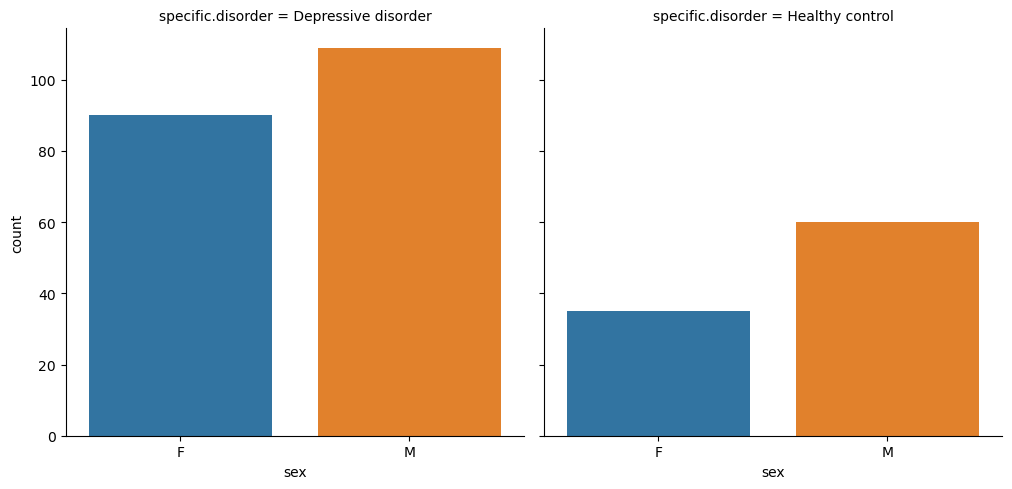

In [9]:
import seaborn as sns
from functools import partial
countplot = partial(sns.countplot, data=measureData)
countplots = partial(sns.catplot, data=measureData, kind='count', col_wrap=3)
countplots(x='sex', col='specific.disorder', col_wrap=3)
plt.show()

In [10]:
data = pd.read_csv('EEG.machinelearing_data_BRMH.csv')
print(measureData['specific.disorder'].value_counts())

Depressive disorder    199
Healthy control         95
Name: specific.disorder, dtype: int64


In [11]:
print("Data Description: \n")
data.describe()

Data Description: 



,no.,age,education,IQ,AB.A.delta.a.FP1,AB.A.delta.b.FP2,AB.A.delta.c.F7,AB.A.delta.d.F3,AB.A.delta.e.Fz,AB.A.delta.f.F4,...,COH.F.gamma.o.Pz.p.P4,COH.F.gamma.o.Pz.q.T6,COH.F.gamma.o.Pz.r.O1,COH.F.gamma.o.Pz.s.O2,COH.F.gamma.p.P4.q.T6,COH.F.gamma.p.P4.r.O1,COH.F.gamma.p.P4.s.O2,COH.F.gamma.q.T6.r.O1,COH.F.gamma.q.T6.s.O2,COH.F.gamma.r.O1.s.O2
count,945.000000,945.000000,930.000000,932.000000,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000,...,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000
mean,473.000000,30.594804,13.438710,101.580472,20.182936,21.177584,17.749553,18.901698,20.447079,19.490329,...,75.889633,55.049113,56.959796,60.739169,69.829254,47.862489,66.832798,39.301406,66.153213,57.056207
std,272.942302,11.781592,2.550461,17.022414,11.282022,12.230662,10.003598,9.079482,9.742912,9.252500,...,15.861641,19.541956,18.326785,18.052887,17.725321,19.685722,17.028701,20.790933,18.088548,19.600107
min,1.000000,18.000000,0.000000,49.000000,3.272260,3.244199,3.050507,3.412618,5.066593,4.048931,...,12.611954,0.519048,6.926792,0.708008,2.421748,0.036664,1.032207,1.228502,0.363268,3.988805
25%,237.000000,21.730000,12.000000,91.000000,12.784872,13.019269,11.134327,12.460586,13.548645,12.637717,...,68.014443,41.607506,43.682444,48.374883,58.937785,32.581046,55.872070,22.049743,54.710605,43.955229
50%,473.000000,26.150000,13.000000,102.000000,17.065286,17.838251,15.541469,16.733004,18.065276,17.432568,...,78.647712,55.158858,56.657348,61.257972,72.298636,45.719426,68.238375,36.549938,67.988937,57.515871
75%,709.000000,35.450000,16.000000,114.000000,24.492760,25.654394,21.623961,23.347900,25.573096,23.956748,...,87.398387,69.740640,70.649245,73.979100,83.066877,62.081839,79.192418,54.169209,79.527764,71.626382
max,945.000000,71.880000,20.000000,145.000000,92.826192,101.515687,91.373456,82.544167,101.566662,77.197502,...,99.678649,100.000000,99.307895,100.000000,99.581629,98.720067,99.650154,98.413320,100.000000,99.287092


In [12]:
data.isnull().sum()

no.                       0
sex                       0
age                       0
eeg.date                  0
education                15
                         ..
COH.F.gamma.p.P4.r.O1     0
COH.F.gamma.p.P4.s.O2     0
COH.F.gamma.q.T6.r.O1     0
COH.F.gamma.q.T6.s.O2     0
COH.F.gamma.r.O1.s.O2     0
Length: 1149, dtype: int64

In [13]:
data.columns

Index(['no.', 'sex', 'age', 'eeg.date', 'education', 'IQ', 'main.disorder',
       'specific.disorder', 'AB.A.delta.a.FP1', 'AB.A.delta.b.FP2',
       ...
       'COH.F.gamma.o.Pz.p.P4', 'COH.F.gamma.o.Pz.q.T6',
       'COH.F.gamma.o.Pz.r.O1', 'COH.F.gamma.o.Pz.s.O2',
       'COH.F.gamma.p.P4.q.T6', 'COH.F.gamma.p.P4.r.O1',
       'COH.F.gamma.p.P4.s.O2', 'COH.F.gamma.q.T6.r.O1',
       'COH.F.gamma.q.T6.s.O2', 'COH.F.gamma.r.O1.s.O2'],
      dtype='object', length=1149)

In [14]:
data.isnull().sum()

no.                       0
sex                       0
age                       0
eeg.date                  0
education                15
                         ..
COH.F.gamma.p.P4.r.O1     0
COH.F.gamma.p.P4.s.O2     0
COH.F.gamma.q.T6.r.O1     0
COH.F.gamma.q.T6.s.O2     0
COH.F.gamma.r.O1.s.O2     0
Length: 1149, dtype: int64

# **Different Frequency Features**

In [15]:
delta_cols = [col for col in data.columns if 'delta' in col]
beta_cols = [col for col in data.columns if 'beta' in col]
theta_cols = [col for col in data.columns if 'theta' in col]
alpha_cols = [col for col in data.columns if 'alpha' in col]

print(f"Number of Delta Columns : {len(delta_cols)}")
print(f"Number of Beta Columns : {len(beta_cols)}")
print(f"Number of Theta Columns : {len(theta_cols)}")
print(f"Number of Alpha Columns : {len(alpha_cols)}")

Number of Delta Columns : 190
Number of Beta Columns : 380
Number of Theta Columns : 190
Number of Alpha Columns : 190


In [16]:
temp_features = delta_cols + beta_cols +theta_cols + alpha_cols
print(f"Number of items in temp_features : {len(temp_features)}")

Number of items in temp_features : 950


# Step-2: Dataset Preprocessing

# **Deleting Some Unnecessary Features**

In [17]:
data.drop(["no.","main.disorder","sex","main.disorder", "age", "eeg.date","education", "IQ", "Unnamed: 122"], axis=1, inplace =True)
data.head()

,specific.disorder,AB.A.delta.a.FP1,AB.A.delta.b.FP2,AB.A.delta.c.F7,AB.A.delta.d.F3,AB.A.delta.e.Fz,AB.A.delta.f.F4,AB.A.delta.g.F8,AB.A.delta.h.T3,AB.A.delta.i.C3,...,COH.F.gamma.o.Pz.p.P4,COH.F.gamma.o.Pz.q.T6,COH.F.gamma.o.Pz.r.O1,COH.F.gamma.o.Pz.s.O2,COH.F.gamma.p.P4.q.T6,COH.F.gamma.p.P4.r.O1,COH.F.gamma.p.P4.s.O2,COH.F.gamma.q.T6.r.O1,COH.F.gamma.q.T6.s.O2,COH.F.gamma.r.O1.s.O2
0,Alcohol use disorder,35.998557,21.717375,21.518280,26.825048,26.611516,25.732649,16.563408,29.891368,22.402246,...,55.989192,16.739679,23.452271,45.678820,30.167520,16.918761,48.850427,9.422630,34.507082,28.613029
1,Alcohol use disorder,13.425118,11.002916,11.942516,15.272216,14.151570,12.456034,8.436832,9.975238,14.834740,...,45.595619,17.510824,26.777368,28.201062,57.108861,32.375401,60.351749,13.900981,57.831848,43.463261
2,Alcohol use disorder,29.941780,27.544684,17.150159,23.608960,27.087811,13.541237,16.523963,12.775574,21.686306,...,99.475453,70.654171,39.131547,69.920996,71.063644,38.534505,69.908764,27.180532,64.803155,31.485799
3,Alcohol use disorder,21.496226,21.846832,17.364316,13.833701,14.100954,13.100939,14.613650,8.063191,11.015078,...,59.986561,63.822201,36.478254,47.117006,84.658376,24.724096,50.299349,35.319695,79.822944,41.141873
4,Alcohol use disorder,37.775667,33.607679,21.865556,21.771413,22.854536,21.456377,15.969042,9.434306,15.244523,...,61.462720,59.166097,51.465531,58.635415,80.685608,62.138436,75.888749,61.003944,87.455509,70.531662


# **Renaming Column (Specific.disorder to Specific_disorder)**

In [18]:

#data.rename(columns={"main.disorder":"main_disorder"}, inplace = True)
data.rename(columns={"specific.disorder":"specific_disorder"}, inplace = True)
data.head()

,specific_disorder,AB.A.delta.a.FP1,AB.A.delta.b.FP2,AB.A.delta.c.F7,AB.A.delta.d.F3,AB.A.delta.e.Fz,AB.A.delta.f.F4,AB.A.delta.g.F8,AB.A.delta.h.T3,AB.A.delta.i.C3,...,COH.F.gamma.o.Pz.p.P4,COH.F.gamma.o.Pz.q.T6,COH.F.gamma.o.Pz.r.O1,COH.F.gamma.o.Pz.s.O2,COH.F.gamma.p.P4.q.T6,COH.F.gamma.p.P4.r.O1,COH.F.gamma.p.P4.s.O2,COH.F.gamma.q.T6.r.O1,COH.F.gamma.q.T6.s.O2,COH.F.gamma.r.O1.s.O2
0,Alcohol use disorder,35.998557,21.717375,21.518280,26.825048,26.611516,25.732649,16.563408,29.891368,22.402246,...,55.989192,16.739679,23.452271,45.678820,30.167520,16.918761,48.850427,9.422630,34.507082,28.613029
1,Alcohol use disorder,13.425118,11.002916,11.942516,15.272216,14.151570,12.456034,8.436832,9.975238,14.834740,...,45.595619,17.510824,26.777368,28.201062,57.108861,32.375401,60.351749,13.900981,57.831848,43.463261
2,Alcohol use disorder,29.941780,27.544684,17.150159,23.608960,27.087811,13.541237,16.523963,12.775574,21.686306,...,99.475453,70.654171,39.131547,69.920996,71.063644,38.534505,69.908764,27.180532,64.803155,31.485799
3,Alcohol use disorder,21.496226,21.846832,17.364316,13.833701,14.100954,13.100939,14.613650,8.063191,11.015078,...,59.986561,63.822201,36.478254,47.117006,84.658376,24.724096,50.299349,35.319695,79.822944,41.141873
4,Alcohol use disorder,37.775667,33.607679,21.865556,21.771413,22.854536,21.456377,15.969042,9.434306,15.244523,...,61.462720,59.166097,51.465531,58.635415,80.685608,62.138436,75.888749,61.003944,87.455509,70.531662


# Taking the two class: Depressive and Healthy

In [19]:
#mood_data = data[(data['main_disorder'] == 'Mood disorder')or(data['main_disorder']=='Healthy control')]
mood_data=data[data['specific_disorder'].isin(['Depressive disorder', 'Healthy control'])]
#mood_data=data[data']
#mood_data=data.isin({'num_wings': [0, 3]})
mood_data


,specific_disorder,AB.A.delta.a.FP1,AB.A.delta.b.FP2,AB.A.delta.c.F7,AB.A.delta.d.F3,AB.A.delta.e.Fz,AB.A.delta.f.F4,AB.A.delta.g.F8,AB.A.delta.h.T3,AB.A.delta.i.C3,...,COH.F.gamma.o.Pz.p.P4,COH.F.gamma.o.Pz.q.T6,COH.F.gamma.o.Pz.r.O1,COH.F.gamma.o.Pz.s.O2,COH.F.gamma.p.P4.q.T6,COH.F.gamma.p.P4.r.O1,COH.F.gamma.p.P4.s.O2,COH.F.gamma.q.T6.r.O1,COH.F.gamma.q.T6.s.O2,COH.F.gamma.r.O1.s.O2
89,Depressive disorder,12.159137,13.113503,9.031007,14.879389,15.834830,19.595759,11.605911,6.084709,13.159062,...,65.408894,59.590594,77.310851,75.280467,57.311188,48.015594,59.579033,68.503920,82.885151,86.986191
90,Depressive disorder,12.404484,9.737819,13.925651,12.325169,15.130696,10.292518,10.263299,11.451697,10.243151,...,84.366954,53.402639,60.535899,73.838548,72.298636,43.330485,71.298037,23.109295,62.098128,67.749204
91,Depressive disorder,16.573145,15.586708,14.094928,12.660197,12.979617,10.611797,8.802664,7.509552,9.903838,...,62.681353,20.062716,36.041763,36.436509,47.491240,20.875426,53.747615,8.009907,50.202188,33.647889
92,Depressive disorder,26.650019,22.823161,17.942133,17.148214,15.338128,14.571966,7.983127,28.158009,12.027862,...,86.582363,83.045735,85.752150,85.875624,86.286859,79.520327,84.541455,82.452224,86.950905,87.384296
93,Depressive disorder,14.624474,14.277301,11.099375,16.047926,17.851932,17.165379,11.682990,6.193040,11.650681,...,85.309981,58.218838,61.211830,65.038486,76.899037,49.849540,71.791429,39.910653,82.739819,62.285969
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
940,Healthy control,41.851823,36.771496,43.671792,36.860889,24.732236,23.607823,23.288260,7.520642,17.636528,...,82.905657,34.850706,63.970519,63.982003,51.244725,62.203684,62.062237,31.013031,31.183413,98.325230
941,Healthy control,18.986856,19.401387,27.586436,20.194732,19.407491,20.216570,16.465027,13.178851,12.687296,...,65.917918,66.700117,44.756285,49.787513,98.905995,54.021304,93.902401,52.740396,92.807331,56.320868
942,Healthy control,28.781317,32.369230,11.717778,23.134370,26.209302,25.484497,22.586688,11.368466,21.799254,...,61.040959,27.632209,45.552852,33.638817,46.690983,19.382928,41.050717,7.045821,41.962451,19.092111
943,Healthy control,19.929100,25.196375,14.445391,16.453456,16.590649,16.007279,18.909188,13.438102,17.442777,...,99.113664,48.328934,41.248470,28.192238,48.665743,42.007147,28.735945,27.176500,27.529522,20.028446


# Encoding (Changing Depressive Disorder to 1, Healthy Control to 0 )


In [20]:
#from sklearn.preprocessing import LabelEncoder, StandardScaler

#label_encoder=LabelEncoder()
#mood_data['specific_disorder'] = label_encoder.fit_transform(mood_data['specific_disorder'])
mood_data['specific_disorder'] = mood_data['specific_disorder'].replace({"Depressive disorder":1,"Healthy control":0})
# mood_data['specific_disorder'].unique()

C:\Users\USER\AppData\Local\Temp\ipykernel_7044\2904134320.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mood_data['specific_disorder'] = mood_data['specific_disorder'].replace({"Depressive disorder":1,"Healthy control":0})


# equalize data and Normalization

In [21]:
print(mood_data['specific_disorder'].value_counts())

1    199
0     95
Name: specific_disorder, dtype: int64


In [22]:
# #Preprocessing
cls_0=mood_data[mood_data['specific_disorder']==0]
cls_1=mood_data[mood_data['specific_disorder']==1]
len(cls_1)
cls_0=cls_0.sample(200,replace=True)
cls_1=cls_1.sample(200,replace=True)
mood_data=pd.concat([cls_1,cls_0],axis=0)
mood_data.info()
for x in mood_data.columns:
    mood_data[x]=(mood_data[x]-mood_data[x].min())/(mood_data[x].max()-mood_data[x].min())
mood_data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 841 to 929
Columns: 1141 entries, specific_disorder to COH.F.gamma.r.O1.s.O2
dtypes: float64(1140), int64(1)
memory usage: 3.5 MB


,specific_disorder,AB.A.delta.a.FP1,AB.A.delta.b.FP2,AB.A.delta.c.F7,AB.A.delta.d.F3,AB.A.delta.e.Fz,AB.A.delta.f.F4,AB.A.delta.g.F8,AB.A.delta.h.T3,AB.A.delta.i.C3,...,COH.F.gamma.o.Pz.p.P4,COH.F.gamma.o.Pz.q.T6,COH.F.gamma.o.Pz.r.O1,COH.F.gamma.o.Pz.s.O2,COH.F.gamma.p.P4.q.T6,COH.F.gamma.p.P4.r.O1,COH.F.gamma.p.P4.s.O2,COH.F.gamma.q.T6.r.O1,COH.F.gamma.q.T6.s.O2,COH.F.gamma.r.O1.s.O2
841,1.0,0.460672,0.405378,0.262045,0.219950,0.191882,0.212988,0.118206,0.251602,0.150100,...,0.794569,0.706629,0.819729,0.788846,0.854458,0.764861,0.850367,0.746709,0.860114,0.832531
587,1.0,0.281506,0.328653,0.204220,0.489661,0.612397,0.647763,0.386512,0.178264,0.330960,...,0.813496,0.593471,0.353626,0.486232,0.787208,0.246971,0.538655,0.170117,0.546536,0.362414
764,1.0,0.479959,0.412879,0.550830,0.491686,0.409447,0.593831,0.797086,0.263794,0.787950,...,0.438176,0.422317,0.281201,0.371084,0.526897,0.252194,0.435870,0.288543,0.515755,0.300065
545,1.0,0.179865,0.332477,0.242326,0.214127,0.215502,0.306306,0.199544,0.255549,0.246218,...,0.762760,0.591259,0.535781,0.652498,0.752064,0.449195,0.678576,0.422886,0.687926,0.589944
755,1.0,0.238071,0.437500,0.661653,0.190857,0.339549,0.208198,0.711966,0.454235,0.189518,...,0.544665,0.339825,0.313132,0.464075,0.647280,0.357980,0.709768,0.261815,0.665558,0.489960


In [23]:
print(mood_data['specific_disorder'].value_counts())

1.0    200
0.0    200
Name: specific_disorder, dtype: int64


# Checking Features Having Null Values

In [24]:
features_with_null=list(data.columns[data.isna().any()])
len(features_with_null)

0

In [25]:
features_with_null

[]

# Dealing With Missing Values

In [26]:
mood_data.isnull().sum()

mood_data.isna().any()
#Check for missing values in each column
columns_with_missing_values = mood_data.isnull().any()

#Get the list of columns with missing values
columns_list = columns_with_missing_values[columns_with_missing_values].index.tolist()

#Print the columns with missing values
print(columns_list)


[]


# Dropping constant features

In [27]:
### It will zero variance features
from sklearn.feature_selection import VarianceThreshold
var_thres=VarianceThreshold(threshold=0)
var_thres.fit(mood_data)
var_thres.get_support()
#data.columns[var_thres.get_support()]
# constant_columns = [column for column in data.columns
#                     if column not in data.columns[var_thres.get_support()]]

# print(len(constant_columns))


array([ True,  True,  True, ...,  True,  True,  True])

# **Standardization**

In [28]:

# from sklearn.preprocessing import StandardScaler
# #specify:
# scaller = StandardScaler()
# x_train = scaller.fit_transform(x_train)
# x_test=scaller.fit_transform(x_test)

In [29]:
print(mood_data['specific_disorder'].value_counts())

1.0    200
0.0    200
Name: specific_disorder, dtype: int64


In [30]:
features=mood_data.to_numpy()
features

array([[1.        , 0.46067249, 0.40537758, ..., 0.74670926, 0.86011402,
        0.8325307 ],
       [1.        , 0.28150582, 0.32865317, ..., 0.17011744, 0.54653621,
        0.36241446],
       [1.        , 0.47995932, 0.41287936, ..., 0.28854308, 0.51575533,
        0.30006462],
       ...,
       [0.        , 0.29875108, 0.31383883, ..., 0.34657058, 0.99289675,
        0.31418976],
       [0.        , 0.02832812, 0.01491267, ..., 0.33851892, 0.61325343,
        0.66693955],
       [0.        , 0.18609587, 0.20678883, ..., 0.88204751, 0.77825789,
        0.9071068 ]])

In [31]:
# # # Target:
# y = specific_disoders_encoding
# # #specify:
# X = preprocessing.StandardScaler().fit_transform(features)

# Shuffling the dataset

In [32]:
#Shuffling the dataset
mood_data=mood_data.sample(frac=1).reset_index()


mood_data.drop(['index'], axis=1, inplace =True)
mood_data

,specific_disorder,AB.A.delta.a.FP1,AB.A.delta.b.FP2,AB.A.delta.c.F7,AB.A.delta.d.F3,AB.A.delta.e.Fz,AB.A.delta.f.F4,AB.A.delta.g.F8,AB.A.delta.h.T3,AB.A.delta.i.C3,...,COH.F.gamma.o.Pz.p.P4,COH.F.gamma.o.Pz.q.T6,COH.F.gamma.o.Pz.r.O1,COH.F.gamma.o.Pz.s.O2,COH.F.gamma.p.P4.q.T6,COH.F.gamma.p.P4.r.O1,COH.F.gamma.p.P4.s.O2,COH.F.gamma.q.T6.r.O1,COH.F.gamma.q.T6.s.O2,COH.F.gamma.r.O1.s.O2
0,0.0,0.165126,0.158510,0.153004,0.151230,0.177925,0.184627,0.174145,0.195216,0.236456,...,0.694786,0.352286,0.246361,0.416433,0.337937,0.147646,0.416282,0.091821,0.186097,0.087973
1,1.0,0.161560,0.173490,0.142373,0.135715,0.141045,0.138546,0.139331,0.196528,0.173551,...,0.660948,0.431345,0.436579,0.487782,0.542938,0.393524,0.529930,0.416989,0.529522,0.470338
2,1.0,0.161273,0.187301,0.109212,0.164814,0.190627,0.186199,0.127969,0.112808,0.183239,...,0.767031,0.524688,0.674772,0.665463,0.793464,0.645967,0.898482,0.512285,0.874807,0.595536
3,1.0,0.219586,0.642427,0.263821,0.373565,0.231442,0.200048,0.369517,0.155749,0.361020,...,0.652654,0.431204,0.528180,0.433197,0.692159,0.459557,0.577343,0.404326,0.713808,0.498165
4,0.0,0.131479,0.138069,0.090594,0.103298,0.112566,0.105015,0.096717,0.077320,0.111897,...,0.267808,0.292387,0.247600,0.363108,0.443860,0.226367,0.425140,0.310136,0.605632,0.580688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.0,0.622247,0.667285,0.766139,0.722557,0.601128,0.578690,0.384435,0.691024,0.901158,...,0.897455,0.829771,0.963665,0.897087,0.818416,0.936375,0.857556,0.967323,0.914410,0.910213
396,0.0,0.226869,0.218793,0.200909,0.228694,0.233505,0.227573,0.171850,0.171390,0.233767,...,0.825415,0.452468,0.509238,0.496384,0.672418,0.435167,0.588676,0.289139,0.612392,0.470560
397,1.0,0.164147,0.166810,0.134766,0.192081,0.198588,0.201813,0.137266,0.102811,0.175944,...,0.828615,0.583382,0.603985,0.655851,0.765369,0.507839,0.719570,0.445751,0.830720,0.611734
398,0.0,0.174145,0.200342,0.217321,0.390465,0.323089,0.229457,0.243934,0.090412,0.238734,...,0.964041,0.750351,0.766023,0.955639,0.804168,0.751696,0.981189,0.637080,0.808339,0.777075


# Exporting CSV

In [33]:
#mood_data.to_csv('Preprocessed_data.csv', index= False)

# Outlier Dealing with Standard deviation

In [34]:
all_features=mood_data.columns

In [35]:
for feature in all_features:
    upper_limit = mood_data[feature].mean() + 3*mood_data[feature].std()
    lower_limit = mood_data[feature].mean() - 3*mood_data[feature].std()
#     print("Upper limit of ",feature, upper_limit)
#     print("Lower limit of ",feature, lower_limit)
    mood_data[feature] = np.where(
    mood_data[feature] > upper_limit,
    upper_limit,
    np.where(
        mood_data[feature] < lower_limit,
        lower_limit,
        mood_data[feature]
        )
    )


# Splitting


# **Depressed & Healthy**

In [36]:
depressed=mood_data[mood_data['specific_disorder']==1]
healthy=mood_data[mood_data['specific_disorder'].isin([0])]

In [37]:
train_depressed = depressed.sample(frac=0.80)
train_healthy=healthy.sample(frac=0.80)

In [38]:
train_all=pd.concat([train_depressed,train_healthy])
#train_all
test_all=mood_data[~mood_data.isin(train_all)].dropna(how = 'all')
#test_all

In [39]:
test_depressed=test_all[test_all['specific_disorder']==0]
test_healthy=test_all[test_all['specific_disorder']==1]
y_train=train_all['specific_disorder']
x_train=train_all.loc[:, train_all.columns != 'specific_disorder']

y_test=train_all['specific_disorder']
x_test=train_all.loc[:, train_all.columns != 'specific_disorder']

# Step-3: Selecting Important Features

# Removing Highly correlated Features

<AxesSubplot:>

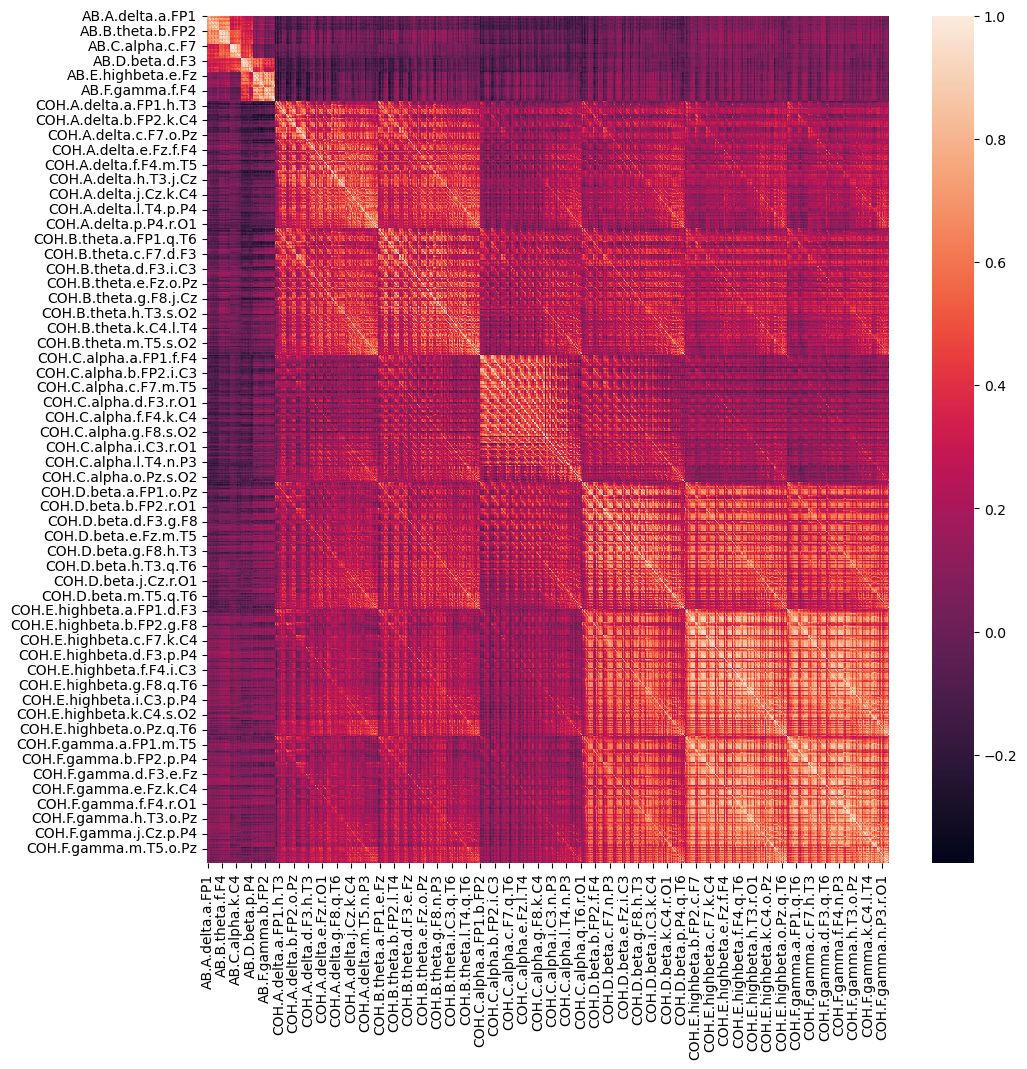

In [40]:
import seaborn as sns
#Using Pearson Correlation
corrmat = x_train.corr()
# corrmat=pd.DataFrame(x_train).corr()
fig, ax = plt.subplots()
fig.set_size_inches(11,11)
sns.heatmap(corrmat)

In [41]:
# # with the following function we can select highly correlated features
# # it will remove the first feature that is correlated with anything other feature

# def correlation(dataset, threshold):
#     col_corr = set()  # Set of all the names of correlated columns
#     corr_matrix = dataset.corr()
#     for i in range(len(corr_matrix.columns)):
#         for j in range(i):
#             if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
#                 colname = corr_matrix.columns[i]  # getting the name of column
#                 col_corr.add(colname)
#     return col_corr

# corr_features = correlation(x_train, 0.70)
# len(set(corr_features))
# #x_train=x_train.drop(corr_features,axis=1)
# #x_test=x_test.drop(corr_features,axis=1)
# #mood_data.drop(corr_features,axis=1)

In [42]:
# after70p_correlation=x_train.columns

In [43]:
# after70p_correlation

In [44]:
after70p_correlationStore25=['AB.A.delta.a.FP1', 'AB.C.alpha.a.FP1', 'AB.D.beta.a.FP1',
       'AB.E.highbeta.a.FP1', 'AB.E.highbeta.r.O1', 'COH.A.delta.a.FP1.b.FP2',
       'COH.A.delta.a.FP1.c.F7', 'COH.A.delta.a.FP1.d.F3',
       'COH.A.delta.a.FP1.h.T3', 'COH.A.delta.a.FP1.m.T5',
       'COH.A.delta.c.F7.h.T3', 'COH.A.delta.d.F3.e.Fz',
       'COH.A.delta.e.Fz.f.F4', 'COH.C.alpha.a.FP1.c.F7',
       'COH.C.alpha.a.FP1.i.C3', 'COH.C.alpha.a.FP1.m.T5',
       'COH.C.alpha.a.FP1.n.P3', 'COH.C.alpha.a.FP1.q.T6',
       'COH.C.alpha.a.FP1.r.O1', 'COH.C.alpha.h.T3.n.P3',
       'COH.C.alpha.h.T3.r.O1', 'COH.D.beta.a.FP1.h.T3',
       'COH.D.beta.a.FP1.i.C3', 'COH.D.beta.a.FP1.k.C4',
       'COH.D.beta.a.FP1.m.T5']  # 25 features
after70p_correlationStore33=['AB.A.delta.a.FP1', 'AB.B.theta.a.FP1', 'AB.C.alpha.a.FP1',
       'AB.D.beta.a.FP1', 'AB.E.highbeta.a.FP1', 'COH.A.delta.a.FP1.b.FP2',
       'COH.A.delta.a.FP1.c.F7', 'COH.A.delta.a.FP1.d.F3',
       'COH.A.delta.a.FP1.h.T3', 'COH.A.delta.a.FP1.i.C3',
       'COH.A.delta.a.FP1.m.T5', 'COH.A.delta.c.F7.h.T3',
       'COH.A.delta.d.F3.e.Fz', 'COH.A.delta.e.Fz.f.F4',
       'COH.A.delta.g.F8.l.T4', 'COH.A.delta.m.T5.r.O1',
       'COH.B.theta.a.FP1.h.T3', 'COH.C.alpha.a.FP1.c.F7',
       'COH.C.alpha.a.FP1.h.T3', 'COH.C.alpha.a.FP1.i.C3',
       'COH.C.alpha.a.FP1.m.T5', 'COH.C.alpha.a.FP1.n.P3',
       'COH.C.alpha.a.FP1.q.T6', 'COH.C.alpha.a.FP1.r.O1',
       'COH.C.alpha.h.T3.m.T5', 'COH.C.alpha.h.T3.r.O1',
       'COH.C.alpha.n.P3.r.O1', 'COH.D.beta.a.FP1.c.F7',
       'COH.D.beta.a.FP1.h.T3', 'COH.D.beta.a.FP1.i.C3',
       'COH.D.beta.a.FP1.k.C4', 'COH.D.beta.a.FP1.m.T5',
       'COH.D.beta.h.T3.m.T5']  # 33 features

In [45]:
x_train = x_train.loc[:,after70p_correlationStore33] # Select columns by features
x_test = x_test.loc[:,after70p_correlationStore33]

In [46]:
x_train

,AB.A.delta.a.FP1,AB.B.theta.a.FP1,AB.C.alpha.a.FP1,AB.D.beta.a.FP1,AB.E.highbeta.a.FP1,COH.A.delta.a.FP1.b.FP2,COH.A.delta.a.FP1.c.F7,COH.A.delta.a.FP1.d.F3,COH.A.delta.a.FP1.h.T3,COH.A.delta.a.FP1.i.C3,...,COH.C.alpha.a.FP1.r.O1,COH.C.alpha.h.T3.m.T5,COH.C.alpha.h.T3.r.O1,COH.C.alpha.n.P3.r.O1,COH.D.beta.a.FP1.c.F7,COH.D.beta.a.FP1.h.T3,COH.D.beta.a.FP1.i.C3,COH.D.beta.a.FP1.k.C4,COH.D.beta.a.FP1.m.T5,COH.D.beta.h.T3.m.T5
166,0.085341,0.063121,0.046305,0.048780,0.052362,0.715694,0.510156,0.568937,0.365616,0.179563,...,0.136765,0.148297,0.020571,0.437760,0.546826,0.385234,0.426197,0.342533,0.115459,0.364719
161,0.329211,0.396646,0.110099,0.110796,0.032425,0.684785,0.587541,0.681346,0.635843,0.510982,...,0.224840,0.321746,0.060003,0.184589,0.728151,0.338722,0.451568,0.363593,0.254597,0.779673
184,0.419103,0.068738,0.022630,0.136457,0.154273,0.555666,0.671103,0.710899,0.575765,0.520861,...,0.061271,0.640247,0.104124,0.335942,0.718972,0.504947,0.541488,0.417327,0.269138,0.325598
41,0.204388,0.194819,0.165549,0.579611,0.110906,0.685944,0.477887,0.595412,0.077231,0.251626,...,0.007572,0.039325,0.016148,0.211200,0.687923,0.240239,0.421553,0.464981,0.001655,0.063566
275,0.241110,0.185820,0.087121,0.258724,0.312161,0.286735,0.331217,0.001969,0.206890,0.054636,...,0.092840,0.403242,0.392399,0.413413,0.614879,0.182807,0.555390,0.460447,0.695388,0.312664
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.622247,0.398409,0.291373,0.490107,0.162861,0.175660,0.223353,0.198674,0.167057,0.223850,...,0.067994,0.488845,0.069283,0.530231,0.534509,0.429768,0.556727,0.467305,0.466195,0.812901
62,0.122728,0.073244,0.096893,0.249554,0.157554,0.850717,0.594834,0.591406,0.182951,0.236710,...,0.210515,0.235813,0.202874,0.390741,0.790556,0.414357,0.469944,0.577624,0.056181,0.333686
304,0.205868,0.242457,0.390819,0.180684,0.038298,0.736438,0.609933,0.703774,0.686778,0.389224,...,0.053020,0.380699,0.092463,0.716555,0.312431,0.384711,0.195087,0.163610,0.052649,0.376141
0,0.165126,0.120614,0.043532,0.081653,0.034824,0.821128,0.738360,0.801944,0.365803,0.397469,...,0.171822,0.110055,0.069861,0.127163,0.654407,0.321083,0.545672,0.705785,0.068484,0.109039


In [47]:
# mood_data.drop(corr_features,axis=1)
# mood_data.drop(['index'], axis=1, inplace =True)
# mood_data.to_csv('afterRemovedHighlyCorreletedData.csv', index= False)

<AxesSubplot:>

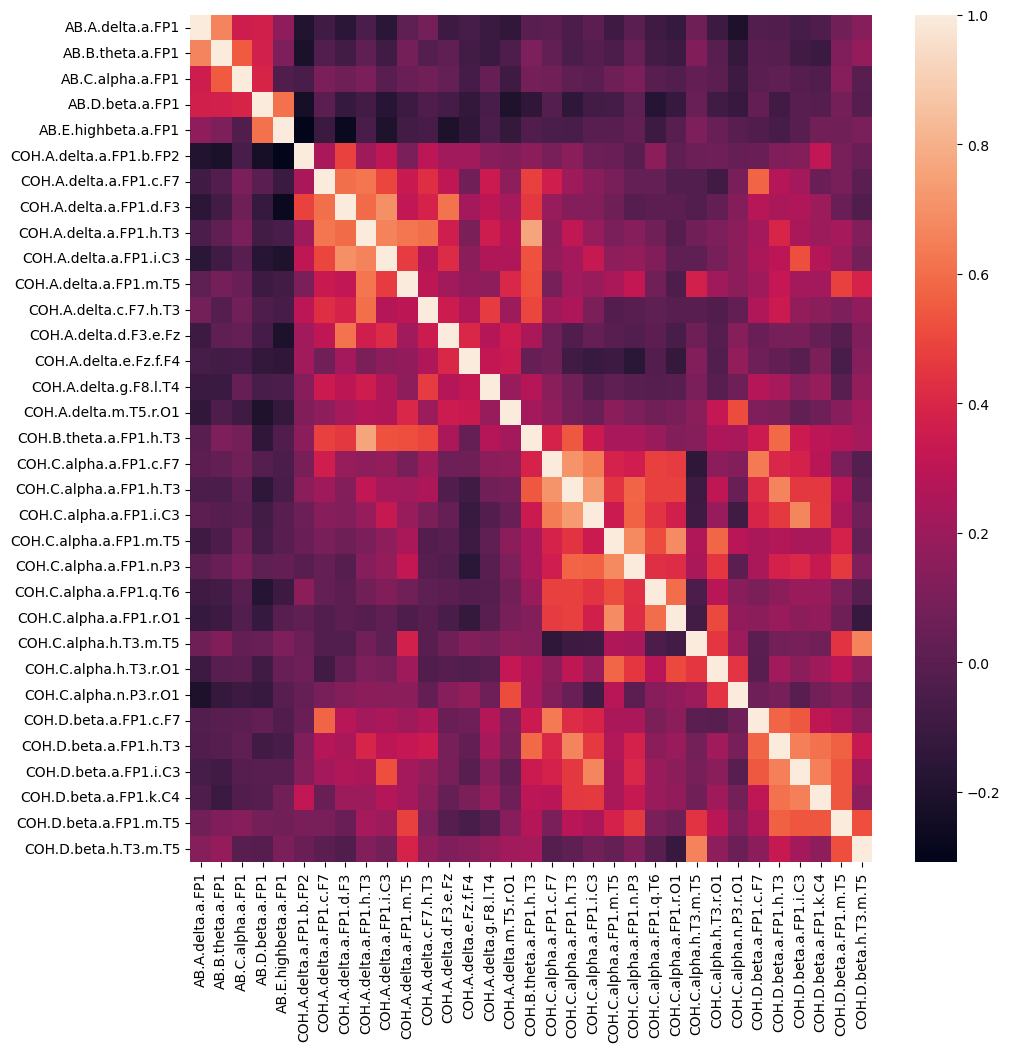

In [48]:
#Heatmap after reducing feature
import seaborn as sns
#Using Pearson Correlation
corrmat = x_train.corr()
# corrmat=pd.DataFrame(x_train).corr()
fig, ax = plt.subplots()
fig.set_size_inches(11,11)
sns.heatmap(corrmat)

In [49]:
x_train

,AB.A.delta.a.FP1,AB.B.theta.a.FP1,AB.C.alpha.a.FP1,AB.D.beta.a.FP1,AB.E.highbeta.a.FP1,COH.A.delta.a.FP1.b.FP2,COH.A.delta.a.FP1.c.F7,COH.A.delta.a.FP1.d.F3,COH.A.delta.a.FP1.h.T3,COH.A.delta.a.FP1.i.C3,...,COH.C.alpha.a.FP1.r.O1,COH.C.alpha.h.T3.m.T5,COH.C.alpha.h.T3.r.O1,COH.C.alpha.n.P3.r.O1,COH.D.beta.a.FP1.c.F7,COH.D.beta.a.FP1.h.T3,COH.D.beta.a.FP1.i.C3,COH.D.beta.a.FP1.k.C4,COH.D.beta.a.FP1.m.T5,COH.D.beta.h.T3.m.T5
166,0.085341,0.063121,0.046305,0.048780,0.052362,0.715694,0.510156,0.568937,0.365616,0.179563,...,0.136765,0.148297,0.020571,0.437760,0.546826,0.385234,0.426197,0.342533,0.115459,0.364719
161,0.329211,0.396646,0.110099,0.110796,0.032425,0.684785,0.587541,0.681346,0.635843,0.510982,...,0.224840,0.321746,0.060003,0.184589,0.728151,0.338722,0.451568,0.363593,0.254597,0.779673
184,0.419103,0.068738,0.022630,0.136457,0.154273,0.555666,0.671103,0.710899,0.575765,0.520861,...,0.061271,0.640247,0.104124,0.335942,0.718972,0.504947,0.541488,0.417327,0.269138,0.325598
41,0.204388,0.194819,0.165549,0.579611,0.110906,0.685944,0.477887,0.595412,0.077231,0.251626,...,0.007572,0.039325,0.016148,0.211200,0.687923,0.240239,0.421553,0.464981,0.001655,0.063566
275,0.241110,0.185820,0.087121,0.258724,0.312161,0.286735,0.331217,0.001969,0.206890,0.054636,...,0.092840,0.403242,0.392399,0.413413,0.614879,0.182807,0.555390,0.460447,0.695388,0.312664
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.622247,0.398409,0.291373,0.490107,0.162861,0.175660,0.223353,0.198674,0.167057,0.223850,...,0.067994,0.488845,0.069283,0.530231,0.534509,0.429768,0.556727,0.467305,0.466195,0.812901
62,0.122728,0.073244,0.096893,0.249554,0.157554,0.850717,0.594834,0.591406,0.182951,0.236710,...,0.210515,0.235813,0.202874,0.390741,0.790556,0.414357,0.469944,0.577624,0.056181,0.333686
304,0.205868,0.242457,0.390819,0.180684,0.038298,0.736438,0.609933,0.703774,0.686778,0.389224,...,0.053020,0.380699,0.092463,0.716555,0.312431,0.384711,0.195087,0.163610,0.052649,0.376141
0,0.165126,0.120614,0.043532,0.081653,0.034824,0.821128,0.738360,0.801944,0.365803,0.397469,...,0.171822,0.110055,0.069861,0.127163,0.654407,0.321083,0.545672,0.705785,0.068484,0.109039


# Forward Feature Selection

In [50]:
# # step forward feature selection

# from mlxtend.feature_selection import SequentialFeatureSelector as SFS
# from sklearn.ensemble import RandomForestRegressor
# sfs1 = SFS(RandomForestRegressor(), 
#            k_features=15, 
#            forward=True, 
#            floating=False, 
#            verbose=2,
#            scoring='r2',
#            cv=3)

# sfs1 = sfs1.fit(np.array(x_train), y_train)
# sfs1.k_feature_idx_ 
# #X_train.columns[list(sfs1.k_feature_idx_)]

In [51]:
x_train

,AB.A.delta.a.FP1,AB.B.theta.a.FP1,AB.C.alpha.a.FP1,AB.D.beta.a.FP1,AB.E.highbeta.a.FP1,COH.A.delta.a.FP1.b.FP2,COH.A.delta.a.FP1.c.F7,COH.A.delta.a.FP1.d.F3,COH.A.delta.a.FP1.h.T3,COH.A.delta.a.FP1.i.C3,...,COH.C.alpha.a.FP1.r.O1,COH.C.alpha.h.T3.m.T5,COH.C.alpha.h.T3.r.O1,COH.C.alpha.n.P3.r.O1,COH.D.beta.a.FP1.c.F7,COH.D.beta.a.FP1.h.T3,COH.D.beta.a.FP1.i.C3,COH.D.beta.a.FP1.k.C4,COH.D.beta.a.FP1.m.T5,COH.D.beta.h.T3.m.T5
166,0.085341,0.063121,0.046305,0.048780,0.052362,0.715694,0.510156,0.568937,0.365616,0.179563,...,0.136765,0.148297,0.020571,0.437760,0.546826,0.385234,0.426197,0.342533,0.115459,0.364719
161,0.329211,0.396646,0.110099,0.110796,0.032425,0.684785,0.587541,0.681346,0.635843,0.510982,...,0.224840,0.321746,0.060003,0.184589,0.728151,0.338722,0.451568,0.363593,0.254597,0.779673
184,0.419103,0.068738,0.022630,0.136457,0.154273,0.555666,0.671103,0.710899,0.575765,0.520861,...,0.061271,0.640247,0.104124,0.335942,0.718972,0.504947,0.541488,0.417327,0.269138,0.325598
41,0.204388,0.194819,0.165549,0.579611,0.110906,0.685944,0.477887,0.595412,0.077231,0.251626,...,0.007572,0.039325,0.016148,0.211200,0.687923,0.240239,0.421553,0.464981,0.001655,0.063566
275,0.241110,0.185820,0.087121,0.258724,0.312161,0.286735,0.331217,0.001969,0.206890,0.054636,...,0.092840,0.403242,0.392399,0.413413,0.614879,0.182807,0.555390,0.460447,0.695388,0.312664
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.622247,0.398409,0.291373,0.490107,0.162861,0.175660,0.223353,0.198674,0.167057,0.223850,...,0.067994,0.488845,0.069283,0.530231,0.534509,0.429768,0.556727,0.467305,0.466195,0.812901
62,0.122728,0.073244,0.096893,0.249554,0.157554,0.850717,0.594834,0.591406,0.182951,0.236710,...,0.210515,0.235813,0.202874,0.390741,0.790556,0.414357,0.469944,0.577624,0.056181,0.333686
304,0.205868,0.242457,0.390819,0.180684,0.038298,0.736438,0.609933,0.703774,0.686778,0.389224,...,0.053020,0.380699,0.092463,0.716555,0.312431,0.384711,0.195087,0.163610,0.052649,0.376141
0,0.165126,0.120614,0.043532,0.081653,0.034824,0.821128,0.738360,0.801944,0.365803,0.397469,...,0.171822,0.110055,0.069861,0.127163,0.654407,0.321083,0.545672,0.705785,0.068484,0.109039


In [52]:
# x_train.columns[list(sfs1.k_feature_idx_)]

In [53]:
# with 80% correlated elimination, 10 feature in forward feature selection. (SVM accuracy : 75)
best_features80p_10f=['AB.D.beta.a.FP1', 'AB.D.beta.l.T4', 'AB.E.highbeta.l.T4',
       'AB.E.highbeta.s.O2', 'COH.A.delta.c.F7.m.T5', 'COH.A.delta.d.F3.f.F4',
       'COH.A.delta.f.F4.i.C3', 'COH.B.theta.a.FP1.m.T5',
       'COH.D.beta.a.FP1.m.T5', 'COH.E.highbeta.f.F4.j.Cz']
best_features70p_15f=['AB.C.alpha.a.FP1', 'COH.A.delta.c.F7.d.F3', 'COH.A.delta.c.F7.h.T3',
       'COH.A.delta.d.F3.e.Fz', 'COH.C.alpha.a.FP1.h.T3',
       'COH.C.alpha.a.FP1.i.C3', 'COH.C.alpha.a.FP1.q.T6',
       'COH.C.alpha.a.FP1.r.O1', 'COH.C.alpha.h.T3.m.T5',
       'COH.D.beta.a.FP1.c.F7', 'COH.D.beta.a.FP1.h.T3',
       'COH.D.beta.a.FP1.i.C3', 'COH.D.beta.a.FP1.k.C4',
       'COH.D.beta.a.FP1.m.T5', 'COH.D.beta.h.T3.m.T5']  #(SVM accuracy : 87.5)
best_features70p_10f=['AB.A.delta.a.FP1', 'AB.C.alpha.a.FP1', 'AB.D.beta.a.FP1',
       'COH.A.delta.d.F3.e.Fz', 'COH.A.delta.e.Fz.f.F4',
       'COH.A.delta.g.F8.l.T4', 'COH.B.theta.a.FP1.h.T3',
       'COH.C.alpha.a.FP1.r.O1', 'COH.D.beta.a.FP1.h.T3',
       'COH.D.beta.a.FP1.i.C3']   #SVM accuracy: 74)

best_features70p33_15f=['AB.B.theta.a.FP1', 'COH.A.delta.a.FP1.h.T3', 'COH.A.delta.a.FP1.m.T5',
       'COH.A.delta.m.T5.r.O1', 'COH.B.theta.a.FP1.h.T3',
       'COH.C.alpha.a.FP1.h.T3', 'COH.C.alpha.a.FP1.i.C3',
       'COH.C.alpha.a.FP1.m.T5', 'COH.C.alpha.a.FP1.n.P3',
       'COH.C.alpha.a.FP1.q.T6', 'COH.C.alpha.h.T3.m.T5',
       'COH.C.alpha.h.T3.r.O1', 'COH.D.beta.a.FP1.c.F7',
       'COH.D.beta.a.FP1.k.C4', 'COH.D.beta.a.FP1.m.T5']



In [54]:

x_train = x_train.loc[:,best_features70p33_15f] # Select columns by Index
x_test = x_test.loc[:,best_features70p33_15f]
mood_data_features=best_features70p33_15f
mood_data_features.append('specific_disorder')
mood_data=mood_data.loc[:,mood_data_features]
# x_train = x_train.iloc[:,list(sfs1.k_feature_idx_)] # Select columns by Index
# x_test = x_test.iloc[:,list(sfs1.k_feature_idx_)]
# mood_data.to_csv('Preprocessed_data_with_15_features.csv', index= False)

In [55]:
x_train

,AB.B.theta.a.FP1,COH.A.delta.a.FP1.h.T3,COH.A.delta.a.FP1.m.T5,COH.A.delta.m.T5.r.O1,COH.B.theta.a.FP1.h.T3,COH.C.alpha.a.FP1.h.T3,COH.C.alpha.a.FP1.i.C3,COH.C.alpha.a.FP1.m.T5,COH.C.alpha.a.FP1.n.P3,COH.C.alpha.a.FP1.q.T6,COH.C.alpha.h.T3.m.T5,COH.C.alpha.h.T3.r.O1,COH.D.beta.a.FP1.c.F7,COH.D.beta.a.FP1.k.C4,COH.D.beta.a.FP1.m.T5
166,0.063121,0.365616,0.096587,0.314630,0.288710,0.248012,0.407702,0.101251,0.015954,0.038202,0.148297,0.020571,0.546826,0.342533,0.115459
161,0.396646,0.635843,0.713730,0.746081,0.760183,0.550157,0.716611,0.014696,0.377778,0.224785,0.321746,0.060003,0.728151,0.363593,0.254597
184,0.068738,0.575765,0.509673,0.514248,0.539918,0.477241,0.656663,0.223348,0.380773,0.149674,0.640247,0.104124,0.718972,0.417327,0.269138
41,0.194819,0.077231,0.026018,0.121346,0.000000,0.181320,0.597278,0.061364,0.244001,0.029856,0.039325,0.016148,0.687923,0.464981,0.001655
275,0.185820,0.206890,0.028315,0.262983,0.255258,0.342100,0.303739,0.126979,0.163871,0.016276,0.403242,0.392399,0.614879,0.460447,0.695388
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.398409,0.167057,0.292351,0.629210,0.205181,0.281888,0.554672,0.109385,0.219907,0.044324,0.488845,0.069283,0.534509,0.467305,0.466195
62,0.073244,0.182951,0.017844,0.552865,0.256688,0.561750,0.711811,0.096507,0.466042,0.140140,0.235813,0.202874,0.790556,0.577624,0.056181
304,0.242457,0.686778,0.369876,0.495905,0.649801,0.501457,0.411606,0.056511,0.123057,0.033351,0.380699,0.092463,0.312431,0.163610,0.052649
0,0.120614,0.365803,0.206278,0.066546,0.367262,0.232838,0.416922,0.028340,0.119509,0.267791,0.110055,0.069861,0.654407,0.705785,0.068484


In [56]:
mood_data

,AB.B.theta.a.FP1,COH.A.delta.a.FP1.h.T3,COH.A.delta.a.FP1.m.T5,COH.A.delta.m.T5.r.O1,COH.B.theta.a.FP1.h.T3,COH.C.alpha.a.FP1.h.T3,COH.C.alpha.a.FP1.i.C3,COH.C.alpha.a.FP1.m.T5,COH.C.alpha.a.FP1.n.P3,COH.C.alpha.a.FP1.q.T6,COH.C.alpha.h.T3.m.T5,COH.C.alpha.h.T3.r.O1,COH.D.beta.a.FP1.c.F7,COH.D.beta.a.FP1.k.C4,COH.D.beta.a.FP1.m.T5,specific_disorder
0,0.120614,0.365803,0.206278,0.066546,0.367262,0.232838,0.416922,0.028340,0.119509,0.267791,0.110055,0.069861,0.654407,0.705785,0.068484,0.0
1,0.177546,0.370044,0.193889,0.269818,0.300417,0.329658,0.533456,0.004593,0.118169,0.274017,0.362153,0.070403,0.592473,0.191506,0.161194,1.0
2,0.097639,0.315089,0.199119,0.416503,0.233322,0.478553,0.533178,0.021859,0.138955,0.055352,0.294291,0.293493,0.486050,0.330691,0.166670,1.0
3,0.119129,0.467756,0.125129,0.625142,0.513436,0.591181,0.533775,0.023129,0.134781,0.191795,0.233112,0.077978,0.617476,0.556944,0.236289,1.0
4,0.075971,0.225025,0.125348,0.456323,0.249492,0.365926,0.549443,0.005730,0.193166,0.029287,0.337854,0.046037,0.533180,0.361321,0.007053,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.398409,0.167057,0.292351,0.629210,0.205181,0.281888,0.554672,0.109385,0.219907,0.044324,0.488845,0.069283,0.534509,0.467305,0.466195,0.0
396,0.147753,0.456858,0.275167,0.516673,0.393264,0.523587,0.466883,0.013677,0.067150,0.027460,0.291712,0.015328,0.707869,0.453702,0.005085,0.0
397,0.081417,0.537078,0.324329,0.762111,0.613714,0.408192,0.651994,0.238147,0.275472,0.307871,0.223376,0.238554,0.671697,0.381809,0.033019,1.0
398,0.122517,0.727008,0.262822,0.995011,0.468491,0.544151,0.267852,0.015485,0.011662,0.511465,0.137016,0.184326,0.569013,0.175590,0.068212,0.0


<AxesSubplot:>

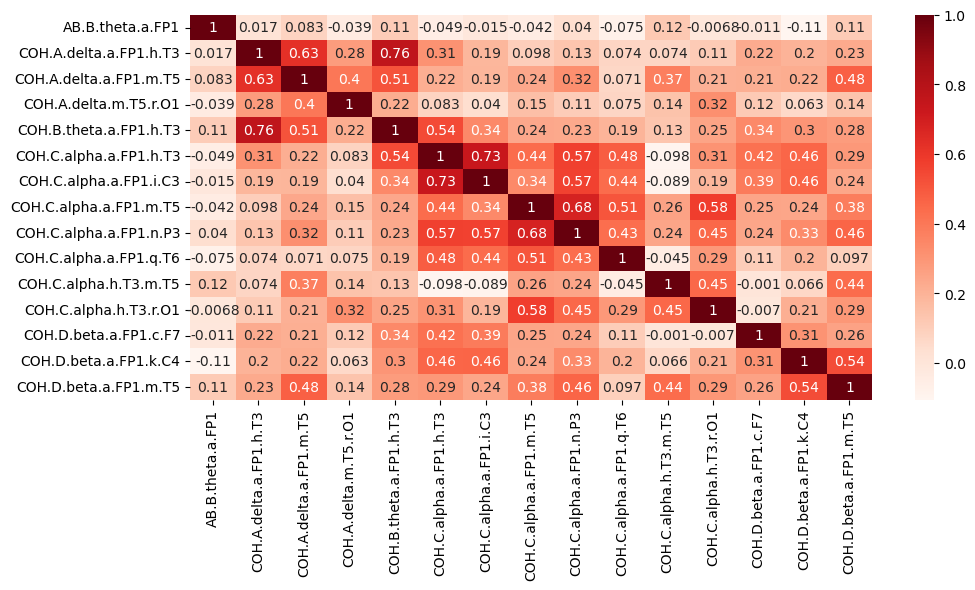

In [57]:
#Heatmap after reducing feature
import seaborn as sns
#Using Pearson Correlation
corrmat = x_train.corr()
fig, ax = plt.subplots()
fig.set_size_inches(11,5)
sns.heatmap(corrmat,annot=True, cmap="Reds")

# Showing Data Distribution Using Pairplot

In [58]:
# Showing Data Distribution Using Pairplot
# sns.pairplot(mood_data)

In [59]:
x_train_smt = x_train 
x_test_smt = x_test
y_train_smt = y_train 
y_test_smt  = y_test

In [60]:
algo_names=[]
all_accuracy=[]
all_sensitivity=[]
all_specificity=[]
all_f1Score=[]

# Step-4: Applying Machine Learning Model

# SVM

0.834375
[[141  19]
 [ 34 126]]
              precision    recall  f1-score   support

         0.0       0.81      0.88      0.84       160
         1.0       0.87      0.79      0.83       160

    accuracy                           0.83       320
   macro avg       0.84      0.83      0.83       320
weighted avg       0.84      0.83      0.83       320



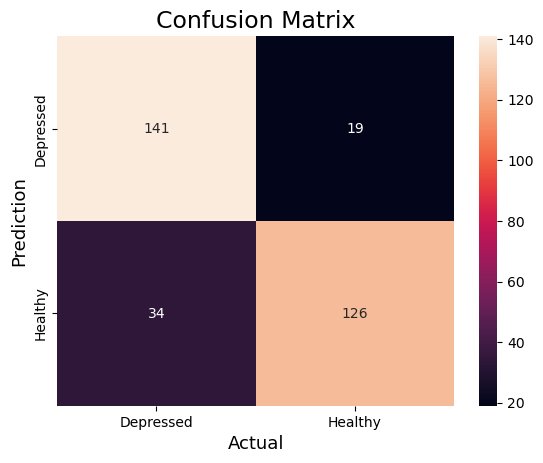

Sensitivity/TPR: 0.7875
FPR: 0.11875
Specificity/TNR: 0.88125
MCC: 0.6717083580145485
Cohen Kappa: 0.66875
0.93150390625 0.93150390625
Accuracy mean and std : 0.775 (0.072)
[[141  19]
 [ 34 126]]
              precision    recall  f1-score   support

         0.0       0.81      0.88      0.84       160
         1.0       0.87      0.79      0.83       160

    accuracy                           0.83       320
   macro avg       0.84      0.83      0.83       320
weighted avg       0.84      0.83      0.83       320



In [61]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
modelSVC = SVC(probability=True)
modelSVC.fit(x_train_smt, y_train_smt)
#print(modelSVC.score(x_test_smt, y_test_smt))

y_pred = modelSVC.predict(x_test_smt)
y_final = y_test
y_pred_svc = y_pred
ac = accuracy_score(y_test_smt, y_pred)
print(ac)
# Performance Measure of SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

y_pred = modelSVC.predict(x_test_smt)
print(confusion_matrix(y_test_smt, y_pred))
print(classification_report(y_test_smt, y_pred))

from sklearn.metrics import cohen_kappa_score
cmSVC = confusion_matrix(y_test_smt, modelSVC.predict(x_test_smt))

#Plot the confusion matrix.
# import seaborn as sns
sns.heatmap(cmSVC,
            annot=True,
            fmt='g',
            xticklabels=['Depressed','Healthy'],
            yticklabels=['Depressed','Healthy'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()



#If we use TP TN FP and FN of below's comment we get range
#FP = cmSVC.sum(axis=0) - np.diag(cmSVC)  
#FN = cmSVC.sum(axis=1) - np.diag(cmSVC)
#TP = np.diag(cmSVC)
#TN = cmSVC.sum() - (FP + FN + TP)

TP = cmSVC[1,1]  
TN = cmSVC[0,0] 
FP = cmSVC[0,1] 
FN = cmSVC[1,0] 

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/float(TP+FN)
# Specificity or true negative rate
TNR = TN/float(TN+FP) 
# Precision or positive predictive value
PPV = TP/float(TP+FP)
# Negative predictive value
NPV = TN/float(TN+FN)
# Fall out or false positive rate
FPR = FP/float(FP+TN)
# False negative rate
FNR = FN/float(TP+FN)
# False discovery rate
FDR = FP/float(TP+FP)
totalSVC=sum(sum(cmSVC))
Accuracy = (TN+TP)/totalSVC
# MCC
val = (TP * TN) - (FP * FN)
MCC_SVC = val / np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))
# Cohen Kappa
Y_pred = modelSVC.predict(x_test_smt)
cohen_score = cohen_kappa_score(y_test_smt, Y_pred)

print("Sensitivity/TPR: " + str(TPR))
print("FPR: " + str(FPR))
print("Specificity/TNR: " + str(TNR))
print("MCC: " + str(MCC_SVC))
print("Cohen Kappa: " + str(cohen_score))
algo_names.append("SVM")
all_accuracy.append(ac)
all_sensitivity.append(TPR)
all_specificity.append(TNR)
f1Score=2*(TPR*PPV)/(TPR+PPV)
all_f1Score.append(f1Score)

# AUC Score
from sklearn.metrics import roc_auc_score

# predict probabilities
pred_prob1 = modelSVC.predict_proba(x_test_smt)
pred_prob2 = modelSVC.predict_proba(x_test_smt)

# auc scores
auc_score1 = roc_auc_score(y_test_smt, pred_prob1[:,1])
auc_score2 = roc_auc_score(y_test_smt, pred_prob2[:,1])

print(auc_score1, auc_score2)
# Support Vector Classifier K - Fold CV
from sklearn.model_selection import cross_val_score
cv_score_for_SVC = cross_val_score(modelSVC, x_train_smt, y_train_smt, cv = 10)
cv_score_for_SVC

from statistics import mean
print('Accuracy mean and std : %.3f (%.3f)' % (mean(cv_score_for_SVC), np.std(cv_score_for_SVC)))
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

y_pred = modelSVC.predict(x_test_smt)
print(confusion_matrix(y_test_smt, y_pred))
print(classification_report(y_test_smt, y_pred))

# Decision Tree Classifier Train, Test

In [62]:
# from sklearn import tree
# from sklearn.metrics import accuracy_score


# modelDTC = tree.DecisionTreeClassifier(max_depth=2, min_samples_leaf=5, min_samples_split=8)
# modelDTC.fit(x_train_smt, y_train_smt)
# print(modelDTC.score(x_test_smt, y_test_smt))

# # Predicting the Test set results
# y_pred = modelDTC.predict(x_test_smt)
# ac = accuracy_score(y_test_smt, y_pred)
# print(ac)

# # Performance Measure of DTC

# from sklearn.metrics import confusion_matrix
# from sklearn.metrics import classification_report

# y_pred = modelDTC.predict(x_test_smt)
# print(confusion_matrix(y_test_smt, y_pred))
# print(classification_report(y_test_smt, y_pred))


# from sklearn.metrics import cohen_kappa_score
# cmDTC = confusion_matrix(y_test_smt, modelDTC.predict(x_test_smt))

# #If we use TP TN FP and FN of below's comment we get range
# #FP = cmSVC.sum(axis=0) - np.diag(cmSVC)  
# #FN = cmSVC.sum(axis=1) - np.diag(cmSVC)
# #TP = np.diag(cmSVC)
# #TN = cmSVC.sum() - (FP + FN + TP)

# TP = cmDTC[1,1]  
# TN = cmDTC[0,0] 
# FP = cmDTC[0,1] 
# FN = cmDTC[1,0] 

# # Sensitivity, hit rate, recall, or true positive rate
# TPR = TP/float(TP+FN)
# # Specificity or true negative rate
# TNR = TN/float(TN+FP) 
# # Precision or positive predictive value
# PPV = TP/float(TP+FP)
# # Negative predictive value
# NPV = TN/float(TN+FN)
# # Fall out or false positive rate
# FPR = FP/float(FP+TN)
# # False negative rate
# FNR = FN/float(TP+FN)
# # False discovery rate
# FDR = FP/float(TP+FP)
# # Accuracy
# totalDTC=sum(sum(cmDTC))
# Accuracy = (TN+TP)/totalDTC
# # MCC
# val = (TP * TN) - (FP * FN)
# MCC_DTC = val / np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))
# # Cohen Kappa
# Y_pred = modelDTC.predict(x_test_smt)
# cohen_score = cohen_kappa_score(y_test_smt, Y_pred)

# print("Sensitivity/TPR: " + str(TPR))
# print("FPR: " + str(FPR))
# print("Specificity/TNR: " + str(TNR))
# print("MCC: " + str(MCC_DTC))
# print("Cohen Kappa: " + str(cohen_score))
# algo_names.append("DecissionTree")
# all_accuracy.append(ac)
# all_sensitivity.append(TPR)
# all_specificity.append(TNR)
# f1Score=2*(TPR*PPV)/(TPR+PPV)
# all_f1Score.append(f1Score)
# #AUC Score
# from sklearn.metrics import roc_auc_score

# # predict probabilities
# pred_prob1 = modelDTC.predict_proba(x_test_smt)
# pred_prob2 = modelDTC.predict_proba(x_test_smt)

# # auc scores
# auc_score1 = roc_auc_score(y_test_smt, pred_prob1[:,1])
# auc_score2 = roc_auc_score(y_test_smt, pred_prob2[:,1])

# print(auc_score1, auc_score2)
# # Decision Tree Classifier K - Fold CV
# from sklearn.model_selection import cross_val_score
# cv_score_for_DTC = cross_val_score(modelDTC, x_train_smt, y_train_smt, cv = 10)
# cv_score_for_DTC
# print('Accuracy mean and std : %.3f (%.3f)' % (np.mean(cv_score_for_DTC), np.std(cv_score_for_DTC)))

# Random Forest Training and Testing

0.91875
0.91875


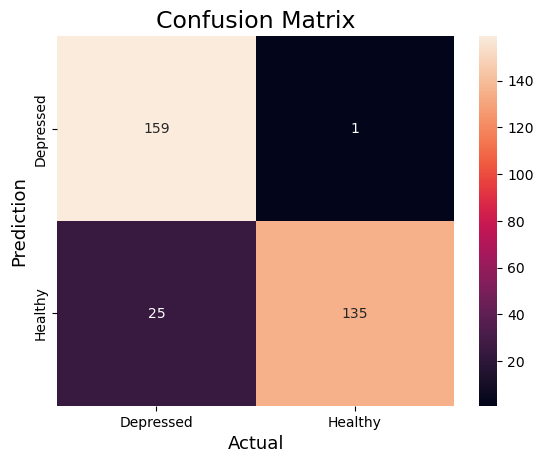

Sensitivity/TPR: 0.84375
FPR: 0.00625
Specificity/TNR: 0.99375
MCC: 0.8470839101854909
Cohen Kappa: 0.8375


In [63]:
from sklearn import ensemble
from sklearn.metrics import accuracy_score

modelRFC = ensemble.RandomForestClassifier(n_estimators = 2)
modelRFC.fit(x_train_smt, y_train_smt)
print(modelRFC.score(x_test_smt, y_test_smt))


# Predicting the Test set results
y_pred = modelRFC.predict(x_test_smt)
ac = accuracy_score(y_test_smt, y_pred)

y_pred_rf = y_pred
print(ac)

# Performance Measure of RFC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

y_pred = modelRFC.predict(x_test_smt)
#print(confusion_matrix(y_test_smt, y_pred))
#print(classification_report(y_test_smt, y_pred))
cr=classification_report(y_test_smt,y_pred)
# f1Score=cr[2][0]
# print(f1Score)

from sklearn.metrics import cohen_kappa_score
cmRFC = confusion_matrix(y_test_smt, modelRFC.predict(x_test_smt))


#Plot the confusion matrix.
# import seaborn as sns
sns.heatmap(cmRFC,
            annot=True,
            fmt='g',
            xticklabels=['Depressed','Healthy'],
            yticklabels=['Depressed','Healthy'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()


#If we use TP TN FP and FN of below's comment we get range
#FP = cmSVC.sum(axis=0) - np.diag(cmSVC)  
#FN = cmSVC.sum(axis=1) - np.diag(cmSVC)
#TP = np.diag(cmSVC)
#TN = cmSVC.sum() - (FP + FN + TP)

TP = cmRFC[1,1]  
TN = cmRFC[0,0] 
FP = cmRFC[0,1] 
FN = cmRFC[1,0] 

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/float(TP+FN)
# Specificity or true negative rate
TNR = TN/float(TN+FP) 
# Precision or positive predictive value
PPV = TP/float(TP+FP)
# Negative predictive value
NPV = TN/float(TN+FN)
# Fall out or false positive rate
FPR = FP/float(FP+TN)
# False negative rate
FNR = FN/float(TP+FN)
# False discovery rate
FDR = FP/float(TP+FP)
# Accuracy
totalRFC=sum(sum(cmRFC))
Accuracy = (TN+TP)/totalRFC
# MCC
val = (TP * TN) - (FP * FN)
MCC_RFC = val / np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))
# Cohen Kappa
Y_pred = modelRFC.predict(x_test_smt)
cohen_score = cohen_kappa_score(y_test_smt, Y_pred)

print("Sensitivity/TPR: " + str(TPR))
print("FPR: " + str(FPR))
print("Specificity/TNR: " + str(TNR))
print("MCC: " + str(MCC_RFC))
print("Cohen Kappa: " + str(cohen_score))
algo_names.append("RandomForest")
all_accuracy.append(ac)
all_sensitivity.append(TPR)
all_specificity.append(TNR)
f1Score=2*(TPR*PPV)/(TPR+PPV)
all_f1Score.append(f1Score)
# #AUC Score
# from sklearn.metrics import roc_auc_score

# # predict probabilities
# pred_prob1 = modelRFC.predict_proba(x_test_smt)
# pred_prob2 = modelRFC.predict_proba(x_test_smt)

# # auc scores
# auc_score1 = roc_auc_score(y_test_smt, pred_prob1[:,1])
# auc_score2 = roc_auc_score(y_test_smt, pred_prob2[:,1])

# print(auc_score1, auc_score2)
# # Random Forest Classifier K - Fold CV
# from sklearn.model_selection import cross_val_score
# cv_score_for_RFC = cross_val_score(modelRFC, x_train_smt, y_train_smt, cv = 10)
# cv_score_for_RFC
# print('Accuracy mean and std : %.3f (%.3f)' % (np.mean(cv_score_for_RFC), np.std(cv_score_for_RFC)))

# Logistic Regression Train, Test

In [64]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import accuracy_score

# modelLR = LogisticRegression()
# modelLR.fit(x_train_smt, y_train_smt)
# print(modelLR.score(x_test_smt, y_test_smt))


# # Predicting the Test set results
# y_pred = modelLR.predict(x_test_smt)
# ac = accuracy_score(y_test_smt, y_pred)
# print(ac)


# # Performance Measure of Logistic regression
# from sklearn.metrics import confusion_matrix
# from sklearn.metrics import classification_report

# y_pred = modelLR.predict(x_test_smt)
# print(confusion_matrix(y_test_smt, y_pred))
# print(classification_report(y_test_smt, y_pred))
# from sklearn.metrics import cohen_kappa_score
# cmLR = confusion_matrix(y_test_smt, modelLR.predict(x_test_smt))

# #If we use TP TN FP and FN of below's comment we get range
# #FP = cmSVC.sum(axis=0) - np.diag(cmSVC)  
# #FN = cmSVC.sum(axis=1) - np.diag(cmSVC)
# #TP = np.diag(cmSVC)
# #TN = cmSVC.sum() - (FP + FN + TP)

# TP = cmLR[1,1]  
# TN = cmLR[0,0] 
# FP = cmLR[0,1] 
# FN = cmLR[1,0] 

# # Sensitivity, hit rate, recall, or true positive rate
# TPR = TP/float(TP+FN)
# # Specificity or true negative rate
# TNR = TN/float(TN+FP) 
# # Precision or positive predictive value
# PPV = TP/float(TP+FP)
# # Negative predictive value
# NPV = TN/float(TN+FN)
# # Fall out or false positive rate
# FPR = FP/float(FP+TN)
# # False negative rate
# FNR = FN/float(TP+FN)
# # False discovery rate
# FDR = FP/float(TP+FP)
# # Accuracy
# totalLR=sum(sum(cmLR))
# Accuracy = (TN+TP)/totalLR
# # MCC
# val = (TP * TN) - (FP * FN)
# MCC_LR = val / np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))
# # Cohen Kappa
# Y_pred = modelLR.predict(x_test_smt)
# cohen_score = cohen_kappa_score(y_test_smt, Y_pred)

# print("Sensitivity/TPR: " + str(TPR))
# print("FPR: " + str(FPR))
# print("Specificity/TNR: " + str(TNR))
# print("MCC: " + str(MCC_LR))
# print("Cohen Kappa: " + str(cohen_score))
# algo_names.append("LogisticRegression")
# all_accuracy.append(ac)
# all_sensitivity.append(TPR)
# all_specificity.append(TNR)
# f1Score=2*(TPR*PPV)/(TPR+PPV)
# all_f1Score.append(f1Score)
# # AUC score
# from sklearn.metrics import roc_auc_score

# # predict probabilities
# pred_prob1 = modelLR.predict_proba(x_test_smt)
# pred_prob2 = modelLR.predict_proba(x_test_smt)

# # auc scores
# auc_score1 = roc_auc_score(y_test_smt, pred_prob1[:,1])
# auc_score2 = roc_auc_score(y_test_smt, pred_prob2[:,1])

# print(auc_score1, auc_score2)
# # Logistic Regression K-fold CV
# from sklearn.model_selection import cross_val_score
# cv_score_for_LR = cross_val_score(modelLR, x_train_smt, y_train_smt, cv = 10)
# cv_score_for_LR
# print('Accuracy mean and std : %.3f (%.3f)' % (np.mean(cv_score_for_LR), np.std(cv_score_for_LR)))

# AdaBoost Algorithm Train, Test 

0.975
0.975
[[156   4]
 [  4 156]]
              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97       160
         1.0       0.97      0.97      0.97       160

    accuracy                           0.97       320
   macro avg       0.97      0.97      0.97       320
weighted avg       0.97      0.97      0.97       320



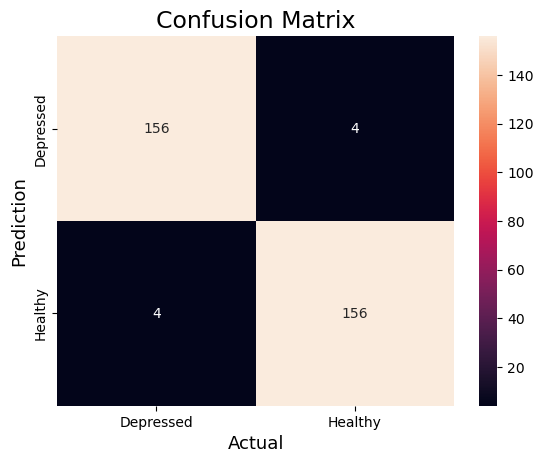

Sensitivity/TPR: 0.975
FPR: 0.025
Specificity/TNR: 0.975
MCC: 0.95
Cohen Kappa: 0.95
0.9971093750000001 0.9971093750000001
[0.8125  0.84375 0.875   0.96875 0.8125  0.9375  0.8125  0.84375 0.90625
 0.875  ]
Accuracy mean and std : 0.869 (0.052)


In [65]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

modelABC = AdaBoostClassifier(random_state = 10)
modelABC.fit(x_train_smt, y_train_smt)
print(modelABC.score(x_test_smt, y_test_smt))

# Predicting the Test set results
y_pred = modelABC.predict(x_test_smt)
ac = accuracy_score(y_test_smt, y_pred)
print(ac)

#performance Measure
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

y_pred = modelABC.predict(x_test_smt)
print(confusion_matrix(y_test_smt, y_pred))
print(classification_report(y_test_smt, y_pred))

from sklearn.metrics import cohen_kappa_score
cmABC = confusion_matrix(y_test_smt, modelABC.predict(x_test_smt))

#Plot the confusion matrix.
# import seaborn as sns
sns.heatmap(cmABC,
            annot=True,
            fmt='g',
            xticklabels=['Depressed','Healthy'],
            yticklabels=['Depressed','Healthy'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()



#If we use TP TN FP and FN of below's comment we get range
#FP = cmSVC.sum(axis=0) - np.diag(cmSVC)  
#FN = cmSVC.sum(axis=1) - np.diag(cmSVC)
#TP = np.diag(cmSVC)
#TN = cmSVC.sum() - (FP + FN + TP)

TP = cmABC[1,1]  
TN = cmABC[0,0] 
FP = cmABC[0,1] 
FN = cmABC[1,0] 

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/float(TP+FN)
# Specificity or true negative rate
TNR = TN/float(TN+FP) 
# Precision or positive predictive value
PPV = TP/float(TP+FP)
# Negative predictive value
NPV = TN/float(TN+FN)
# Fall out or false positive rate
FPR = FP/float(FP+TN)
# False negative rate
FNR = FN/float(TP+FN)
# False discovery rate
FDR = FP/float(TP+FP)
# Accuracy
totalABC = sum(sum(cmABC))
Accuracy = (TN+TP)/totalABC

# MCC
val = (TP * TN) - (FP * FN)
MCC_ABC = val / np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))

# Cohen Kappa
Y_pred = modelABC.predict(x_test_smt)
cohen_score = cohen_kappa_score(y_test_smt, Y_pred)

print("Sensitivity/TPR: " + str(TPR))
print("FPR: " + str(FPR))
print("Specificity/TNR: " + str(TNR))
print("MCC: " + str(MCC_ABC))
print("Cohen Kappa: " + str(cohen_score))
algo_names.append("AdaBoost")
all_accuracy.append(ac)
all_sensitivity.append(TPR)
all_specificity.append(TNR)
f1Score=2*(TPR*PPV)/(TPR+PPV)
all_f1Score.append(f1Score)

#AUC Score
from sklearn.metrics import roc_auc_score

# predict probabilities
pred_prob1 = modelABC.predict_proba(x_test_smt)
pred_prob2 = modelABC.predict_proba(x_test_smt)

# auc scores
auc_score1 = roc_auc_score(y_test_smt, pred_prob1[:,1])
auc_score2 = roc_auc_score(y_test_smt, pred_prob2[:,1])

print(auc_score1, auc_score2)
from sklearn.model_selection import cross_val_score
cv_score_for_ABC = cross_val_score(modelABC, x_train_smt, y_train_smt, cv = 10)
print(cv_score_for_ABC)
print('Accuracy mean and std : %.3f (%.3f)' % (np.mean(cv_score_for_ABC), np.std(cv_score_for_ABC)))

## XGBoost

In [66]:
# # Training the Naive Bayes model on the Training set
# #conda install -c anaconda py-xgboost
# !pip install xgboost
# import xgboost as xgb
# from sklearn.metrics import accuracy_score

# modelXGB = xgb.XGBClassifier()

# modelXGB.fit(x_train_smt, y_train_smt)
# print('Training',modelXGB.score(x_train_smt, y_train_smt))
# # Predicting the Test set results
# y_pred = modelXGB.predict(x_test_smt)
# ac = accuracy_score(y_test_smt, y_pred)
# print('Testing',ac)
# cm = confusion_matrix(y_test_smt, y_pred)
# cm

# #performence measure
# from sklearn.metrics import confusion_matrix
# from sklearn.metrics import classification_report

# y_pred = modelXGB.predict(x_test_smt)
# print(confusion_matrix(y_test_smt, y_pred))
# print(classification_report(y_test_smt, y_pred))
# from sklearn.metrics import cohen_kappa_score
# cmGNB = confusion_matrix(y_test_smt, modelXGB.predict(x_test_smt))

# #If we use TP TN FP and FN of below's comment we get range
# #FP = cmSVC.sum(axis=0) - np.diag(cmSVC)  
# #FN = cmSVC.sum(axis=1) - np.diag(cmSVC)
# #TP = np.diag(cmSVC)
# #TN = cmSVC.sum() - (FP + FN + TP)

# TP = cmGNB[1,1]  
# TN = cmGNB[0,0] 
# FP = cmGNB[0,1] 
# FN = cmGNB[1,0] 

# # Sensitivity, hit rate, recall, or true positive rate
# TPR = TP/float(TP+FN)
# # Specificity or true negative rate
# TNR = TN/float(TN+FP) 
# # Precision or positive predictive value
# PPV = TP/float(TP+FP)
# # Negative predictive value
# NPV = TN/float(TN+FN)
# # Fall out or false positive rate
# FPR = FP/float(FP+TN)
# # False negative rate
# FNR = FN/float(TP+FN)
# # False discovery rate
# FDR = FP/float(TP+FP)
# # Accuracy
# totalGNB=sum(sum(cmGNB))
# Accuracy = (TN+TP)/totalGNB
# # MCC
# val = (TP * TN) - (FP * FN)
# MCC_GNB = val / np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))
# # Cohen Kappa
# Y_pred = modelXGB.predict(x_test_smt)
# cohen_score = cohen_kappa_score(y_test_smt, Y_pred)

# print("Sensitivity/TPR: " + str(TPR))
# print("FPR: " + str(FPR))
# print("Specificity/TNR: " + str(TNR))
# print("MCC: " + str(MCC_GNB))
# print("Cohen Kappa: " + str(cohen_score))
# algo_names.append("XGBoost")
# all_accuracy.append(ac)
# all_sensitivity.append(TPR)
# all_specificity.append(TNR)
# f1Score=2*(TPR*PPV)/(TPR+PPV)
# all_f1Score.append(f1Score)

# #AUC Score
# from sklearn.metrics import roc_auc_score

# # predict probabilities
# pred_prob1 = modelXGB.predict_proba(x_test_smt)
# pred_prob2 = modelXGB.predict_proba(x_test_smt)

# # auc scores
# auc_score1 = roc_auc_score(y_test_smt, pred_prob1[:,1])
# auc_score2 = roc_auc_score(y_test_smt, pred_prob2[:,1])

# print(auc_score1, auc_score2)

# from sklearn.model_selection import cross_val_score
# cv_score_for_xgb= cross_val_score(modelXGB, x_train_smt, y_train_smt, cv = 10)
# print(cv_score_for_xgb)
# print('Accuracy mean and std : %.3f (%.3f)' % (np.mean(cv_score_for_xgb), np.std(cv_score_for_xgb)))

# KNN

0.85
0.85


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

[[130  30]
 [ 18 142]]
              precision    recall  f1-score   support

         0.0       0.88      0.81      0.84       160
         1.0       0.83      0.89      0.86       160

    accuracy                           0.85       320
   macro avg       0.85      0.85      0.85       320
weighted avg       0.85      0.85      0.85       320



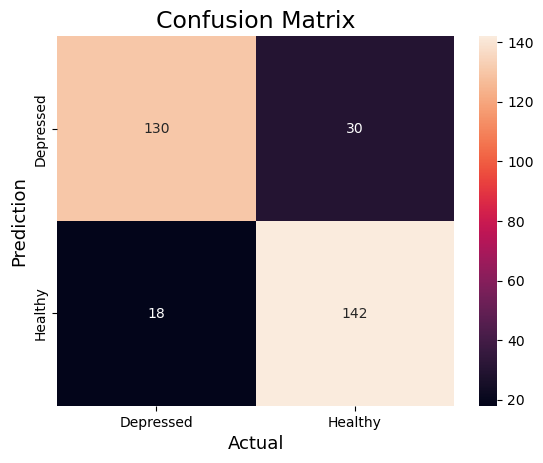

Sensitivity/TPR: 0.8875
FPR: 0.1875
Specificity/TNR: 0.8125
MCC: 0.7019770947894602
Cohen Kappa: 0.7


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [67]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

modelKNN = KNeighborsClassifier(n_neighbors = 5, weights = 'uniform', metric = 'minkowski', p = 2)
modelKNN.fit(x_train_smt, y_train_smt)
print(modelKNN.score(x_test_smt, y_test_smt))

# Predicting the Test set results
y_pred = modelKNN.predict(x_test_smt)
ac = accuracy_score(y_test_smt, y_pred)
print(ac)

# Performance Measure of KNN
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

y_pred = modelKNN.predict(x_test_smt)
print(confusion_matrix(y_test_smt, y_pred))
print(classification_report(y_test_smt, y_pred))
from sklearn.metrics import cohen_kappa_score
cmKNN = confusion_matrix(y_test_smt, modelKNN.predict(x_test_smt))


#Plot the confusion matrix.
# import seaborn as sns
sns.heatmap(cmKNN,
            annot=True,
            fmt='g',
            xticklabels=['Depressed','Healthy'],
            yticklabels=['Depressed','Healthy'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()



#If we use TP TN FP and FN of below's comment we get range
#FP = cmSVC.sum(axis=0) - np.diag(cmSVC)  
#FN = cmSVC.sum(axis=1) - np.diag(cmSVC)
#TP = np.diag(cmSVC)
#TN = cmSVC.sum() - (FP + FN + TP)

TP = cmKNN[1,1]  
TN = cmKNN[0,0] 
FP = cmKNN[0,1] 
FN = cmKNN[1,0] 

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/float(TP+FN)
# Specificity or true negative rate
TNR = TN/float(TN+FP) 
# Precision or positive predictive value
PPV = TP/float(TP+FP)
# Negative predictive value
NPV = TN/float(TN+FN)
# Fall out or false positive rate
FPR = FP/float(FP+TN)
# False negative rate
FNR = FN/float(TP+FN)
# False discovery rate
FDR = FP/float(TP+FP)
# Accuracy
totalKNN = sum(sum(cmKNN))
Accuracy = (TN+TP)/totalKNN
# MCC
val = (TP * TN) - (FP * FN)
MCC_KNN = val / np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))
# Cohen Kappa
Y_pred = modelKNN.predict(x_test_smt)
cohen_score = cohen_kappa_score(y_test_smt, Y_pred)

print("Sensitivity/TPR: " + str(TPR))
print("FPR: " + str(FPR))
print("Specificity/TNR: " + str(TNR))
print("MCC: " + str(MCC_KNN))
print("Cohen Kappa: " + str(cohen_score))
algo_names.append("KNN")
all_accuracy.append(ac)
all_sensitivity.append(TPR)
all_specificity.append(TNR)
f1Score=2*(TPR*PPV)/(TPR+PPV)
all_f1Score.append(f1Score)

# Evaluation

In [68]:
from sklearn import metrics
print("Accuracy is",metrics.accuracy_score(y_test,y_pred)," when k = 3")
print("Accuracy is",metrics.accuracy_score(y_test,y_pred)," when k = 5")
print("Accuracy is",metrics.accuracy_score(y_test,y_pred)," when k = 7")

Accuracy is 0.85  when k = 3
Accuracy is 0.85  when k = 5
Accuracy is 0.85  when k = 7


In [69]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.88      0.81      0.84       160
         1.0       0.83      0.89      0.86       160

    accuracy                           0.85       320
   macro avg       0.85      0.85      0.85       320
weighted avg       0.85      0.85      0.85       320



## Stacking Ensemble

Testing 0.996875


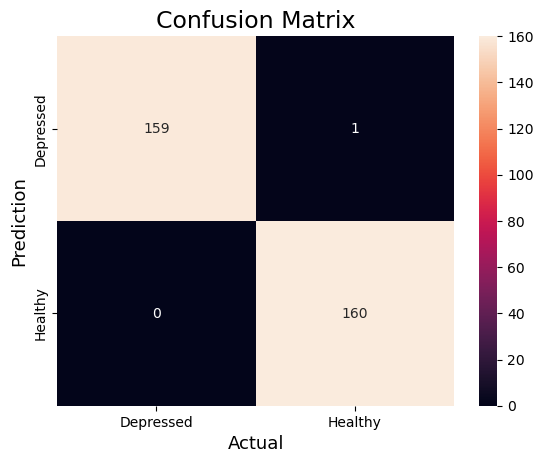

[[159   1]
 [  0 160]]
              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00       160
         1.0       0.99      1.00      1.00       160

    accuracy                           1.00       320
   macro avg       1.00      1.00      1.00       320
weighted avg       1.00      1.00      1.00       320

Sensitivity/TPR: 1.0
FPR: 0.00625
Specificity/TNR: 0.99375
MCC: 0.9937694097483343
Cohen Kappa: 0.99375


In [70]:
# knn,svm, randomForest
# base=randomforest
#make a prediction with a stacking ensemble
from sklearn.datasets import make_classification
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB


# define the base models
level0 = list()
#level0.append(('lr', LogisticRegression()))  #52.8%  (but increasing the accuracy)
level0.append(('knn', KNeighborsClassifier()))
#level0.append(('cart', DecisionTreeClassifier()))  #adding it gives worst performance
#level0.append(('CB',CatBoostClassifier(iterations=500)))
level0.append(('svm', SVC()))  #58.6%
#level0.append(('xgb',xgb.XGBClassifier()))   #69.9%
level0.append(('rf', ensemble.RandomForestClassifier()))  # 72


# define meta learner model
#level1 = LogisticRegression()
level1 = ensemble.RandomForestClassifier()
# define the stacking ensemble
model = StackingClassifier(estimators=level0, final_estimator=level1, cv=10)

# fit the model on all available data
model.fit(x_train_smt, y_train_smt)

y_pred = model.predict(x_test_smt)
ac = accuracy_score(y_test_smt, y_pred)
print('Testing',ac)
cm = confusion_matrix(y_test_smt, y_pred)
cm

#Plot the confusion matrix.
# import seaborn as sns
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['Depressed','Healthy'],
            yticklabels=['Depressed','Healthy'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()




from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

y_pred = model.predict(x_test_smt)
print(confusion_matrix(y_test_smt, y_pred))
print(classification_report(y_test_smt, y_pred))

from sklearn.metrics import cohen_kappa_score
cmGNB = confusion_matrix(y_test_smt, model.predict(x_test_smt))

#If we use TP TN FP and FN of below's comment we get range
#FP = cmSVC.sum(axis=0) - np.diag(cmSVC)  
#FN = cmSVC.sum(axis=1) - np.diag(cmSVC)
#TP = np.diag(cmSVC)
#TN = cmSVC.sum() - (FP + FN + TP)

TP = cmGNB[1,1]  
TN = cmGNB[0,0] 
FP = cmGNB[0,1] 
FN = cmGNB[1,0] 

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/float(TP+FN)
# Specificity or true negative rate
TNR = TN/float(TN+FP) 
# Precision or positive predictive value
PPV = TP/float(TP+FP)
# Negative predictive value
NPV = TN/float(TN+FN)
# Fall out or false positive rate
FPR = FP/float(FP+TN)
# False negative rate
FNR = FN/float(TP+FN)
# False discovery rate
FDR = FP/float(TP+FP)
# Accuracy
totalGNB=sum(sum(cmGNB))
Accuracy = (TN+TP)/totalGNB
# MCC
val = (TP * TN) - (FP * FN)
MCC_GNB = val / np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))
# Cohen Kappa
Y_pred = model.predict(x_test_smt)
cohen_score = cohen_kappa_score(y_test_smt, Y_pred)

print("Sensitivity/TPR: " + str(TPR))
print("FPR: " + str(FPR))
print("Specificity/TNR: " + str(TNR))
print("MCC: " + str(MCC_GNB))
print("Cohen Kappa: " + str(cohen_score))
algo_names.append("StackingEnsemble")
all_accuracy.append(ac)
all_sensitivity.append(TPR)
all_specificity.append(TNR)
f1Score=2*(TPR*PPV)/(TPR+PPV)
all_f1Score.append(f1Score)

In [71]:
Performance_Matrix = {
    "Algo Names": algo_names,
    "Accuracy": all_accuracy,
    "Sensitivity": all_sensitivity,
    "Specificity": all_specificity,
    "F1-Score": all_f1Score
  
   # "AUC": auc_scores
    # Add more key-value pairs for other metrics if needed
}
Performance_Matrix = pd.DataFrame(Performance_Matrix)
Performance_Matrix

,Algo Names,Accuracy,Sensitivity,Specificity,F1-Score
0,SVM,0.834375,0.78750,0.88125,0.826230
1,RandomForest,0.918750,0.84375,0.99375,0.912162
2,AdaBoost,0.975000,0.97500,0.97500,0.975000
3,KNN,0.850000,0.88750,0.81250,0.855422
4,StackingEnsemble,0.996875,1.00000,0.99375,0.996885


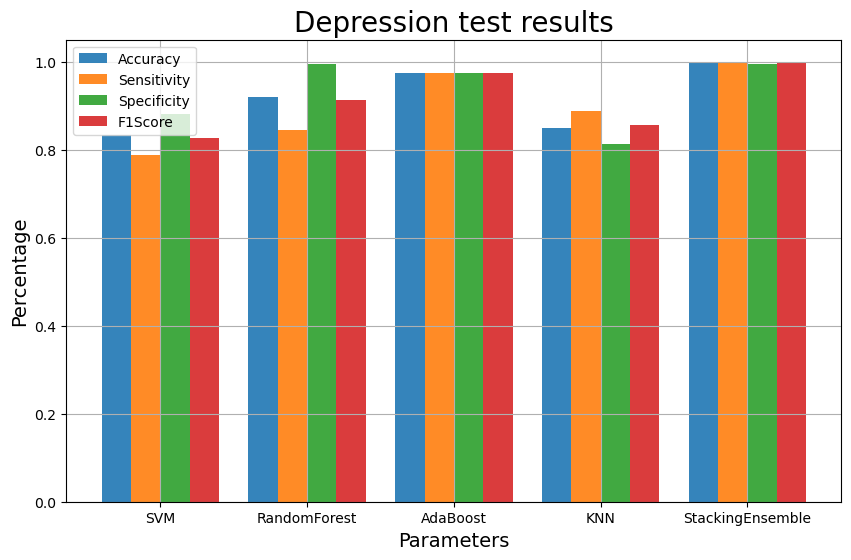

In [72]:
#bar chart for informations
index=np.arange(5)
bar_width=.2

plt.figure(figsize=(10, 6))
k1=plt.bar(index,all_accuracy,bar_width,alpha=.9,label="Accuracy")
c1=plt.bar(index+bar_width,all_sensitivity,bar_width,alpha=.9,label="Sensitivity")
ch1=plt.bar(index+bar_width*2,all_specificity,bar_width,alpha=.9,label="Specificity")
f1=plt.bar(index+bar_width*3,all_f1Score,bar_width,alpha=.9,label="F1Score")

plt.xticks(index+.6/2,algo_names)
plt.ylabel('Percentage',fontsize=14)
plt.xlabel('Parameters',fontsize=14)
plt.title('Depression test results',fontsize=20)
plt.grid(True)
plt.legend()
plt.show()

# Step-5: Validation

# 5-Fold Cross Validation SVM

In [73]:
depressed=mood_data[mood_data['specific_disorder']==1]
healthy=mood_data[mood_data['specific_disorder'].isin([0])]


fold_names = []
accuracies = []
Sensitivity = []
Specificity=[]
F1Score=[]
FPRs = []
cohen_kappas = []
auc_scores = []
    
final_ac=0
final_TPR=0  #Sensitivity, recall
final_TNR=0  # Specifity
final_f1Score=0
final_PPV=0  # Precission
final_FPR=0  
final_cohen_score=0
final_auc_score1=0
for i in range(5):
    fr=(i+1)*40
#     if i==4:
#         fr=fr-1
    #print(fr)
    test_depressed = depressed.iloc[i*40:(i+1)*40, :]
    #test_depressed.head()
    train_depressed = depressed[~depressed.isin(test_depressed)].dropna(how = 'all')
    train_depressed
    test_healthy = healthy.iloc[i*(40):40*(i+1), :]
    #print(19*(i+1))
    #test_depressed.head()
    train_healthy = healthy[~healthy.isin(test_healthy)].dropna(how = 'all')
    train_healthy
    train_all=pd.concat([train_depressed,train_healthy])
    test_all=pd.concat([test_depressed,test_healthy])
    y_train=train_all['specific_disorder']
    x_train=train_all.drop('specific_disorder', axis=1)
    y_test=test_all['specific_disorder']
    x_test=test_all.drop('specific_disorder', axis=1)
    x_train_smt = x_train 
    x_test_smt = x_test
    y_train_smt = y_train 
    y_test_smt  = y_test
    

    from sklearn.svm import SVC
    from sklearn.metrics import accuracy_score
    modelSVC = SVC(probability=True)
    modelSVC.fit(x_train_smt, y_train_smt)
    #print(modelSVC.score(x_test_smt, y_test_smt))

    y_pred = modelSVC.predict(x_test_smt)
    y_final = y_test
    y_pred_svc = y_pred
    ac = accuracy_score(y_test_smt, y_pred)
    print(ac)
    
    
    # Performance Measure of SVC
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report

    y_pred = modelSVC.predict(x_test_smt)
    #print(confusion_matrix(y_test_smt, y_pred))
    #print(classification_report(y_test_smt, y_pred))
    from sklearn.metrics import cohen_kappa_score
    cmSVC = confusion_matrix(y_test_smt, modelSVC.predict(x_test_smt))
    cmSVC
    
    #If we use TP TN FP and FN of below's comment we get range
    #FP = cmSVC.sum(axis=0) - np.diag(cmSVC)  
    #FN = cmSVC.sum(axis=1) - np.diag(cmSVC)
    #TP = np.diag(cmSVC)
    #TN = cmSVC.sum() - (FP + FN + TP)
    
    TP = cmSVC[1,1]  
    TN = cmSVC[0,0] 
    FP = cmSVC[0,1] 
    FN = cmSVC[1,0] 
    
    # Sensitivity, hit rate, recall, or true positive rate
    TPR = TP/float(TP+FN)
    # Specificity or true negative rate
    TNR = TN/float(TN+FP) 
    # Precision or positive predictive value
    PPV = TP/float(TP+FP)
    # Negative predictive value
    NPV = TN/float(TN+FN)
    # Fall out or false positive rate
    FPR = FP/float(FP+TN)
    # False negative rate
    FNR = FN/float(TP+FN)
    # False discovery rate
    FDR = FP/float(TP+FP)
    totalSVC=sum(sum(cmSVC))
    Accuracy = (TN+TP)/totalSVC
    # MCC
    val = (TP * TN) - (FP * FN)
    MCC_SVC = val / np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))
    # Cohen Kappa
    Y_pred = modelSVC.predict(x_test_smt)
    cohen_score = cohen_kappa_score(y_test_smt, Y_pred)
    
    #print("Sensitivity/TPR: " + str(TPR))
    #print("FPR: " + str(FPR))
    #print("Specificity/TNR: " + str(TNR))
    #print("MCC: " + str(MCC_SVC))
    #print("Cohen Kappa: " + str(cohen_score))
    
    # AUC Score
    from sklearn.metrics import roc_auc_score

    # predict probabilities
    pred_prob1 = modelSVC.predict_proba(x_test_smt)
    pred_prob2 = modelSVC.predict_proba(x_test_smt)

    # auc scores
    auc_score1 = roc_auc_score(y_test_smt, pred_prob1[:,1])
    auc_score2 = roc_auc_score(y_test_smt, pred_prob2[:,1])

    #print(auc_score1, auc_score2)
    
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report

    y_pred = modelSVC.predict(x_test_smt)
    #print(confusion_matrix(y_test_smt, y_pred))
    #print(classification_report(y_test_smt, y_pred))
    
    foldNo="fold "+str(i+1)
    final_ac=final_ac+ac
    final_TPR=final_TPR+TPR
    final_TNR=final_TNR+TNR
    final_FPR=final_FPR+FPR
    final_cohen_score=final_cohen_score+cohen_score
    final_auc_score1=final_auc_score1+auc_score1
    f1Score=2*(TPR*PPV)/(TPR+PPV)
    final_f1Score=final_f1Score+f1Score
    fold_names.append(foldNo)
    accuracies.append(ac)
    Sensitivity.append(TPR)
    Specificity.append(TNR)
    F1Score.append(f1Score)
    FPRs.append(FPR)
    cohen_kappas.append(cohen_score)
    auc_scores.append(auc_score1)
    
final_ac=final_ac/5.0
final_TPR=final_TPR/5.0
final_TNR=final_TNR/5.0
final_f1Score=final_f1Score/5.0
final_FPR=final_FPR/5.0
final_cohen_score=final_cohen_score/5.0
final_auc_score1=final_auc_score1/5.0

foldNo="average"
fold_names.append(foldNo)
accuracies.append(final_ac)
Sensitivity.append(final_TPR)
Specificity.append(final_TNR)
F1Score.append(final_f1Score)
FPRs.append(final_FPR)
cohen_kappas.append(final_cohen_score)
auc_scores.append(final_auc_score1)





Performance_Matrix = {
    "SVM": fold_names,
    "Accuracy": accuracies,
    "Sensitivity": Sensitivity,
    "Specificity": Specificity,
    "F1-Score": F1Score,
    "FPR": FPRs
   # "AUC": auc_scores
    # Add more key-value pairs for other metrics if needed
}
 
Performance_Matrix = pd.DataFrame(Performance_Matrix)
Performance_Matrix


0.775
0.775
0.8375
0.775
0.85


,SVM,Accuracy,Sensitivity,Specificity,F1-Score,FPR
0,fold 1,0.7750,0.65,0.900,0.742857,0.100
1,fold 2,0.7750,0.85,0.700,0.790698,0.300
2,fold 3,0.8375,0.85,0.825,0.839506,0.175
3,fold 4,0.7750,0.70,0.850,0.756757,0.150
4,fold 5,0.8500,0.75,0.950,0.833333,0.050
5,average,0.8025,0.76,0.845,0.792630,0.155


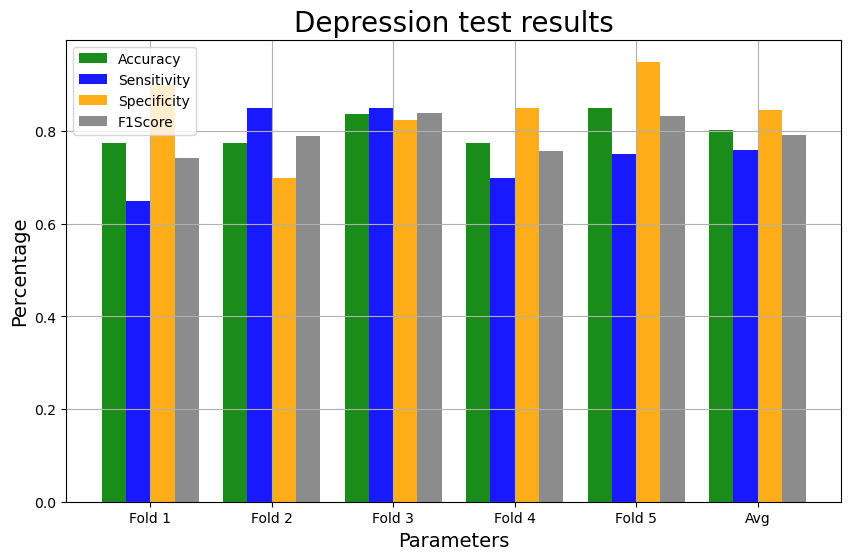

In [74]:
#bar chart for informations
index=np.arange(6)
bar_width=.2

plt.figure(figsize=(10, 6))
k1=plt.bar(index,accuracies,bar_width,alpha=.9,color='green',label="Accuracy")
c1=plt.bar(index+bar_width,Sensitivity,bar_width,alpha=.9,color='blue',label="Sensitivity")
ch1=plt.bar(index+bar_width*2,Specificity,bar_width,alpha=.9,color='orange',label="Specificity")
f1=plt.bar(index+bar_width*3,F1Score,bar_width,alpha=.9,color='gray',label="F1Score")

plt.xticks(index+.6/2,('Fold 1','Fold 2','Fold 3','Fold 4','Fold 5','Avg'))
plt.ylabel('Percentage',fontsize=14)
plt.xlabel('Parameters',fontsize=14)
plt.title('Depression test results',fontsize=20)
plt.grid(True)
plt.legend()
plt.show()

# 5 Fold Cross Validation of Decision Tree Classifier

In [75]:
# depressed=mood_data[mood_data['specific_disorder']==1]
# healthy=mood_data[mood_data['specific_disorder'].isin([0])]


# fold_names = []
# accuracies = []
# Sensitivity = []
# Specificity=[]
# F1Score=[]
# FPRs = []
# cohen_kappas = []
# auc_scores = []
    
# final_ac=0
# final_TPR=0  #Sensitivity, recall
# final_TNR=0  # Specifity
# final_f1Score=0
# final_PPV=0  # Precission
# final_FPR=0  
# final_cohen_score=0
# final_auc_score1=0
# for i in range(5):
#     fr=(i+1)*40
# #     if i==4:
# #         fr=fr-1
#     #print(fr)
#     test_depressed = depressed.iloc[i*40:(i+1)*40, :]
#     #test_depressed.head()
#     train_depressed = depressed[~depressed.isin(test_depressed)].dropna(how = 'all')
#     train_depressed
#     test_healthy = healthy.iloc[i*(40):40*(i+1), :]
#     #print(19*(i+1))
#     #test_depressed.head()
#     train_healthy = healthy[~healthy.isin(test_healthy)].dropna(how = 'all')
#     train_healthy
#     train_all=pd.concat([train_depressed,train_healthy])
#     test_all=pd.concat([test_depressed,test_healthy])
#     y_train=train_all['specific_disorder']
#     x_train=train_all.drop('specific_disorder', axis=1)
#     y_test=test_all['specific_disorder']
#     x_test=test_all.drop('specific_disorder', axis=1)
#     x_train_smt = x_train 
#     x_test_smt = x_test
#     y_train_smt = y_train 
#     y_test_smt  = y_test
    

#     #Decission Tree Main Model
    
#     from sklearn import tree
#     from sklearn.metrics import accuracy_score


#     modelDTC = tree.DecisionTreeClassifier(max_depth=100, min_samples_leaf=5, min_samples_split=8)
#     modelDTC.fit(x_train_smt, y_train_smt)
#     #print(modelDTC.score(x_test_smt, y_test_smt))

#     # Predicting the Test set results
#     y_pred = modelDTC.predict(x_test_smt)
#     ac = accuracy_score(y_test_smt, y_pred)
#     print(ac)

    
#     # Performance Measure of DTC

#     from sklearn.metrics import confusion_matrix
#     from sklearn.metrics import classification_report
#     y_pred = modelDTC.predict(x_test_smt)
    
#     from sklearn.metrics import cohen_kappa_score
#     cmDTC = confusion_matrix(y_test_smt, modelDTC.predict(x_test_smt))

#     #If we use TP TN FP and FN of below's comment we get range
#     #FP = cmSVC.sum(axis=0) - np.diag(cmSVC)  
#     #FN = cmSVC.sum(axis=1) - np.diag(cmSVC)
#     #TP = np.diag(cmSVC)
#     #TN = cmSVC.sum() - (FP + FN + TP)

#     TP = cmDTC[1,1]  
#     TN = cmDTC[0,0] 
#     FP = cmDTC[0,1] 
#     FN = cmDTC[1,0] 

#     # Sensitivity, hit rate, recall, or true positive rate
#     TPR = TP/float(TP+FN)
#     # Specificity or true negative rate
#     TNR = TN/float(TN+FP) 
#     # Precision or positive predictive value
#     PPV = TP/float(TP+FP)
#     # Negative predictive value
#     NPV = TN/float(TN+FN)
#     # Fall out or false positive rate
#     FPR = FP/float(FP+TN)
#     # False negative rate
#     FNR = FN/float(TP+FN)
#     # False discovery rate
#     FDR = FP/float(TP+FP)
#     # Accuracy
#     totalDTC=sum(sum(cmDTC))
#     Accuracy = (TN+TP)/totalDTC
#     # MCC
#     val = (TP * TN) - (FP * FN)
#     MCC_DTC = val / np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))
#     # Cohen Kappa
#     Y_pred = modelDTC.predict(x_test_smt)
#     cohen_score = cohen_kappa_score(y_test_smt, Y_pred)

#     #print("Sensitivity/TPR: " + str(TPR))
#     #print("FPR: " + str(FPR))
#     #print("Specificity/TNR: " + str(TNR))
#     #print("MCC: " + str(MCC_DTC))
#     #print("Cohen Kappa: " + str(cohen_score))
    
#     #AUC Score
#     from sklearn.metrics import roc_auc_score

#     # predict probabilities
#     pred_prob1 = modelDTC.predict_proba(x_test_smt)
#     pred_prob2 = modelDTC.predict_proba(x_test_smt)

#     # auc scores
#     auc_score1 = roc_auc_score(y_test_smt, pred_prob1[:,1])
#     auc_score2 = roc_auc_score(y_test_smt, pred_prob2[:,1])



   
#     foldNo="fold "+str(i+1)
#     final_ac=final_ac+ac
#     final_TPR=final_TPR+TPR
#     final_TNR=final_TNR+TNR
#     final_FPR=final_FPR+FPR
#     final_cohen_score=final_cohen_score+cohen_score
#     final_auc_score1=final_auc_score1+auc_score1
#     f1Score=2*(TPR*PPV)/(TPR+PPV)
#     final_f1Score=final_f1Score+f1Score
#     fold_names.append(foldNo)
#     accuracies.append(ac)
#     Sensitivity.append(TPR)
#     Specificity.append(TNR)
#     F1Score.append(f1Score)
#     FPRs.append(FPR)
#     cohen_kappas.append(cohen_score)
#     auc_scores.append(auc_score1)
    
# final_ac=final_ac/5.0
# final_TPR=final_TPR/5.0
# final_TNR=final_TNR/5.0
# final_f1Score=final_f1Score/5.0
# final_FPR=final_FPR/5.0
# final_cohen_score=final_cohen_score/5.0
# final_auc_score1=final_auc_score1/5.0

# foldNo="average"
# fold_names.append(foldNo)
# accuracies.append(final_ac)
# Sensitivity.append(final_TPR)
# Specificity.append(final_TNR)
# F1Score.append(final_f1Score)
# FPRs.append(final_FPR)
# cohen_kappas.append(final_cohen_score)
# auc_scores.append(final_auc_score1)


# Performance_Matrix = {
#     "DecissionTree": fold_names,
#     "Accuracy": accuracies,
#     "Sensitivity": Sensitivity,
#     "Specificity": Specificity,
#     "F1-Score": F1Score,
#     "FPR": FPRs
#     #"Cohen's Kappa": cohen_kappas,
#    # "AUC": auc_scores
#     # Add more key-value pairs for other metrics if needed
# }


# Performance_Matrix = pd.DataFrame(Performance_Matrix)
# Performance_Matrix


In [76]:
# #bar chart for informations
# index=np.arange(6)
# bar_width=.2

# plt.figure(figsize=(10, 6))
# k1=plt.bar(index,accuracies,bar_width,alpha=.9,label="Accuracy")
# c1=plt.bar(index+bar_width,Sensitivity,bar_width,alpha=.9,label="Sensitivity")
# ch1=plt.bar(index+bar_width*2,Specificity,bar_width,alpha=.9,label="Specificity")
# f1=plt.bar(index+bar_width*3,F1Score,bar_width,alpha=.9,label="F1Score")

# plt.xticks(index+.6/2,('Fold 1','Fold 2','Fold 3','Fold 4','Fold 5','Avg'))
# plt.ylabel('Percentage',fontsize=14)
# plt.xlabel('Parameters',fontsize=14)
# plt.title('Depression test results',fontsize=20)
# plt.grid(True)
# plt.legend()
# plt.show()

# 5 Fold Cross Validation Random Forest 

In [77]:
depressed=mood_data[mood_data['specific_disorder']==1]
healthy=mood_data[mood_data['specific_disorder'].isin([0])]

fold_names = []
accuracies = []
Sensitivity = []
Specificity=[]
F1Score=[]
FPRs = []
cohen_kappas = []
auc_scores = []
    
final_ac=0
final_TPR=0  #Sensitivity, recall
final_TNR=0  # Specifity
final_f1Score=0
final_PPV=0  # Precission
final_FPR=0  
final_cohen_score=0
final_auc_score1=0

for i in range(5):
    fr=(i+1)*40
#     if i==4:
#         fr=fr-1
    #print(fr)
    test_depressed = depressed.iloc[i*40:(i+1)*40, :]
    #test_depressed.head()
    train_depressed = depressed[~depressed.isin(test_depressed)].dropna(how = 'all')
    train_depressed
    test_healthy = healthy.iloc[i*(40):40*(i+1), :]
    #print(19*(i+1))
    #test_depressed.head()
    train_healthy = healthy[~healthy.isin(test_healthy)].dropna(how = 'all')
    train_healthy
    train_all=pd.concat([train_depressed,train_healthy])
    test_all=pd.concat([test_depressed,test_healthy])
    y_train=train_all['specific_disorder']
    x_train=train_all.drop('specific_disorder', axis=1)
    y_test=test_all['specific_disorder']
    x_test=test_all.drop('specific_disorder', axis=1)
    x_train_smt = x_train 
    x_test_smt = x_test
    y_train_smt = y_train 
    y_test_smt  = y_test
    
    #Random Forest Main
    from sklearn import ensemble
    from sklearn.metrics import accuracy_score

    modelRFC = ensemble.RandomForestClassifier(n_estimators = 12)
    modelRFC.fit(x_train_smt, y_train_smt)
    #print(modelRFC.score(x_test_smt, y_test_smt))
    # Predicting the Test set results
    y_pred = modelRFC.predict(x_test_smt)
    ac = accuracy_score(y_test_smt, y_pred)
    y_pred_rf = y_pred
    print(ac)

    # Performance Measure of RFC
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report
    y_pred = modelRFC.predict(x_test_smt)
    
    from sklearn.metrics import cohen_kappa_score
    cmRFC = confusion_matrix(y_test_smt, modelRFC.predict(x_test_smt))



    TP = cmRFC[1,1]  
    TN = cmRFC[0,0] 
    FP = cmRFC[0,1] 
    FN = cmRFC[1,0] 

    # Sensitivity, hit rate, recall, or true positive rate
    TPR = TP/float(TP+FN)
    # Specificity or true negative rate
    TNR = TN/float(TN+FP) 
    # Precision or positive predictive value
    PPV = TP/float(TP+FP)
    # Negative predictive value
    NPV = TN/float(TN+FN)
    # Fall out or false positive rate
    FPR = FP/float(FP+TN)
    # False negative rate
    FNR = FN/float(TP+FN)
    # False discovery rate
    FDR = FP/float(TP+FP)
    # Accuracy
    totalRFC=sum(sum(cmRFC))
    Accuracy = (TN+TP)/totalRFC
    # MCC
    val = (TP * TN) - (FP * FN)
    MCC_RFC = val / np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))
    # Cohen Kappa
    Y_pred = modelRFC.predict(x_test_smt)
    cohen_score = cohen_kappa_score(y_test_smt, Y_pred)
 
    #AUC Score
    from sklearn.metrics import roc_auc_score

    # predict probabilities
    pred_prob1 = modelRFC.predict_proba(x_test_smt)
    pred_prob2 = modelRFC.predict_proba(x_test_smt)
    
    # auc scores
    auc_score1 = roc_auc_score(y_test_smt, pred_prob1[:,1])
    auc_score2 = roc_auc_score(y_test_smt, pred_prob2[:,1])

    
    
    foldNo="fold "+str(i+1)
    final_ac=final_ac+ac
    final_TPR=final_TPR+TPR
    final_TNR=final_TNR+TNR
    final_FPR=final_FPR+FPR
    final_cohen_score=final_cohen_score+cohen_score
    final_auc_score1=final_auc_score1+auc_score1
    f1Score=2*(TPR*PPV)/(TPR+PPV)
    final_f1Score=final_f1Score+f1Score
    fold_names.append(foldNo)
    accuracies.append(ac)
    Sensitivity.append(TPR)
    Specificity.append(TNR)
    F1Score.append(f1Score)
    FPRs.append(FPR)
    cohen_kappas.append(cohen_score)
    auc_scores.append(auc_score1)
    
final_ac=final_ac/5.0
final_TPR=final_TPR/5.0
final_TNR=final_TNR/5.0
final_f1Score=final_f1Score/5.0
final_FPR=final_FPR/5.0
final_cohen_score=final_cohen_score/5.0
final_auc_score1=final_auc_score1/5.0

foldNo="average"
fold_names.append(foldNo)
accuracies.append(final_ac)
Sensitivity.append(final_TPR)
Specificity.append(final_TNR)
F1Score.append(final_f1Score)
FPRs.append(final_FPR)
cohen_kappas.append(final_cohen_score)
auc_scores.append(final_auc_score1)


Performance_Matrix = {
    "Random Forest": fold_names,
    "Accuracy": accuracies,
    "Sensitivity": Sensitivity,
    "Specificity": Specificity,
    "F1-Score": F1Score,
    "FPR": FPRs
    #"Cohen's Kappa": cohen_kappas,
   # "AUC": auc_scores
    # Add more key-value pairs for other metrics if needed
}


Performance_Matrix = pd.DataFrame(Performance_Matrix)
Performance_Matrix


0.925
0.8375
0.875
0.9125
0.925


,Random Forest,Accuracy,Sensitivity,Specificity,F1-Score,FPR
0,fold 1,0.9250,0.900,0.950,0.923077,0.050
1,fold 2,0.8375,0.900,0.775,0.847059,0.225
2,fold 3,0.8750,0.800,0.950,0.864865,0.050
3,fold 4,0.9125,0.900,0.925,0.911392,0.075
4,fold 5,0.9250,0.875,0.975,0.921053,0.025
5,average,0.8950,0.875,0.915,0.893489,0.085


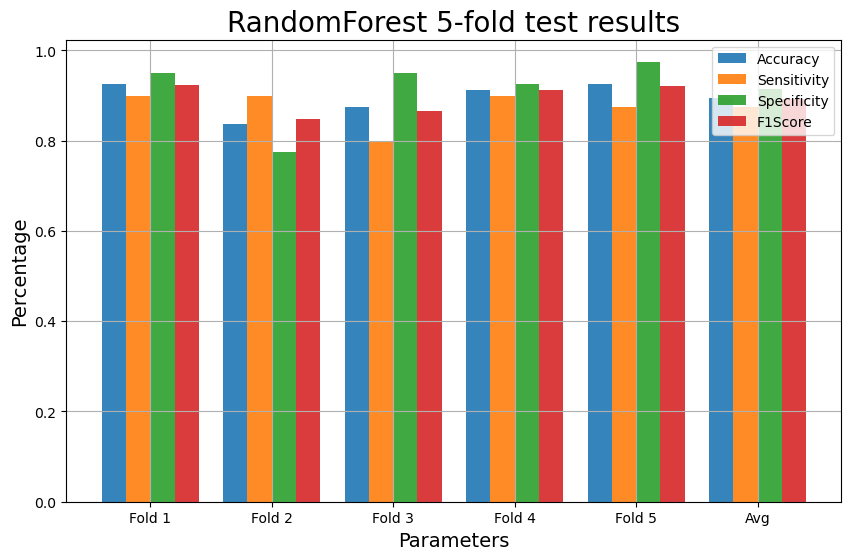

In [78]:
#bar chart for informations
index=np.arange(6)
bar_width=.2

plt.figure(figsize=(10, 6))
k1=plt.bar(index,accuracies,bar_width,alpha=.9,label="Accuracy")
c1=plt.bar(index+bar_width,Sensitivity,bar_width,alpha=.9,label="Sensitivity")
ch1=plt.bar(index+bar_width*2,Specificity,bar_width,alpha=.9,label="Specificity")
f1=plt.bar(index+bar_width*3,F1Score,bar_width,alpha=.9,label="F1Score")

plt.xticks(index+.6/2,('Fold 1','Fold 2','Fold 3','Fold 4','Fold 5','Avg'))
plt.ylabel('Percentage',fontsize=14)
plt.xlabel('Parameters',fontsize=14)
plt.title('RandomForest 5-fold test results',fontsize=20)
plt.grid(True)
plt.legend()
plt.show()

# 5-Fold Cross Validation for Logistic Regression

In [79]:

# depressed=mood_data[mood_data['specific_disorder']==1]
# healthy=mood_data[mood_data['specific_disorder'].isin([0])]


# fold_names = []
# accuracies = []
# Sensitivity = []
# Specificity=[]
# F1Score=[]
# FPRs = []
# cohen_kappas = []
# auc_scores = []
    
# final_ac=0
# final_TPR=0  #Sensitivity, recall
# final_TNR=0  # Specifity
# final_f1Score=0
# final_PPV=0  # Precission
# final_FPR=0  
# final_cohen_score=0
# final_auc_score1=0

# for i in range(5):
#     fr=(i+1)*40
# #     if i==4:
# #         fr=fr-1
#     #print(fr)
#     test_depressed = depressed.iloc[i*40:(i+1)*40, :]
#     #test_depressed.head()
#     train_depressed = depressed[~depressed.isin(test_depressed)].dropna(how = 'all')
#     train_depressed
#     test_healthy = healthy.iloc[i*(40):40*(i+1), :]
#     #print(19*(i+1))
#     #test_depressed.head()
#     train_healthy = healthy[~healthy.isin(test_healthy)].dropna(how = 'all')
#     train_healthy
#     train_all=pd.concat([train_depressed,train_healthy])
#     test_all=pd.concat([test_depressed,test_healthy])
#     y_train=train_all['specific_disorder']
#     x_train=train_all.drop('specific_disorder', axis=1)
#     y_test=test_all['specific_disorder']
#     x_test=test_all.drop('specific_disorder', axis=1)
#     x_train_smt = x_train 
#     x_test_smt = x_test
#     y_train_smt = y_train 
#     y_test_smt  = y_test
    
#     from sklearn.linear_model import LogisticRegression
#     from sklearn.metrics import accuracy_score

#     modelLR = LogisticRegression()
#     modelLR.fit(x_train_smt, y_train_smt)
#     #print(modelLR.score(x_test_smt, y_test_smt))

#     # Predicting the Test set results
#     y_pred = modelLR.predict(x_test_smt)
#     ac = accuracy_score(y_test_smt, y_pred)
#     print(ac)
    
#     # Performance Measure of Logistic regression
#     from sklearn.metrics import confusion_matrix
#     from sklearn.metrics import classification_report
#     y_pred = modelLR.predict(x_test_smt)
    
    
#     from sklearn.metrics import cohen_kappa_score
#     cmLR = confusion_matrix(y_test_smt, modelLR.predict(x_test_smt))
    
    
#     TP = cmLR[1,1]  
#     TN = cmLR[0,0] 
#     FP = cmLR[0,1] 
#     FN = cmLR[1,0] 

#     # Sensitivity, hit rate, recall, or true positive rate
#     TPR = TP/float(TP+FN)
#     # Specificity or true negative rate
#     TNR = TN/float(TN+FP) 
#     # Precision or positive predictive value
#     PPV = TP/float(TP+FP)
#     # Negative predictive value
#     NPV = TN/float(TN+FN)
#     # Fall out or false positive rate
#     FPR = FP/float(FP+TN)
#     # False negative rate
#     FNR = FN/float(TP+FN)
#     # False discovery rate
#     FDR = FP/float(TP+FP)
#     # Accuracy
#     totalLR=sum(sum(cmLR))
#     Accuracy = (TN+TP)/totalLR
#     # MCC
#     val = (TP * TN) - (FP * FN)
#     MCC_LR = val / np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))
#     # Cohen Kappa
#     Y_pred = modelLR.predict(x_test_smt)
#     cohen_score = cohen_kappa_score(y_test_smt, Y_pred)
#     # AUC score
#     from sklearn.metrics import roc_auc_score

#     # predict probabilities
#     pred_prob1 = modelLR.predict_proba(x_test_smt)
#     pred_prob2 = modelLR.predict_proba(x_test_smt)

#     # auc scores
#     auc_score1 = roc_auc_score(y_test_smt, pred_prob1[:,1])
#     auc_score2 = roc_auc_score(y_test_smt, pred_prob2[:,1])
    
    
#     foldNo="fold "+str(i+1)
#     final_ac=final_ac+ac
#     final_TPR=final_TPR+TPR
#     final_TNR=final_TNR+TNR
#     final_FPR=final_FPR+FPR
#     final_cohen_score=final_cohen_score+cohen_score
#     final_auc_score1=final_auc_score1+auc_score1
#     f1Score=2*(TPR*PPV)/(TPR+PPV)
#     final_f1Score=final_f1Score+f1Score
#     fold_names.append(foldNo)
#     accuracies.append(ac)
#     Sensitivity.append(TPR)
#     Specificity.append(TNR)
#     F1Score.append(f1Score)
#     FPRs.append(FPR)
#     cohen_kappas.append(cohen_score)
#     auc_scores.append(auc_score1)
    
# final_ac=final_ac/5.0
# final_TPR=final_TPR/5.0
# final_TNR=final_TNR/5.0
# final_f1Score=final_f1Score/5.0
# final_FPR=final_FPR/5.0
# final_cohen_score=final_cohen_score/5.0
# final_auc_score1=final_auc_score1/5.0

# foldNo="average"
# fold_names.append(foldNo)
# accuracies.append(final_ac)
# Sensitivity.append(final_TPR)
# Specificity.append(final_TNR)
# F1Score.append(final_f1Score)
# FPRs.append(final_FPR)
# cohen_kappas.append(final_cohen_score)
# auc_scores.append(final_auc_score1)


# Performance_Matrix = {
#     "Logistic Regression": fold_names,
#     "Accuracy": accuracies,
#     "Sensitivity": Sensitivity,
#     "Specificity": Specificity,
#     "F1-Score": F1Score,
#     "FPR": FPRs,
#     #"Cohen's Kappa": cohen_kappas,
#    # "AUC": auc_scores
#     # Add more key-value pairs for other metrics if needed
# }


# Performance_Matrix = pd.DataFrame(Performance_Matrix)
# Performance_Matrix


In [80]:
# #bar chart for informations
# index=np.arange(6)
# bar_width=.2

# plt.figure(figsize=(10, 6))
# k1=plt.bar(index,accuracies,bar_width,alpha=.9,label="Accuracy")
# c1=plt.bar(index+bar_width,Sensitivity,bar_width,alpha=.9,label="Sensitivity")
# ch1=plt.bar(index+bar_width*2,Specificity,bar_width,alpha=.9,label="Specificity")
# f1=plt.bar(index+bar_width*3,F1Score,bar_width,alpha=.9,label="F1Score")

# plt.xticks(index+.6/2,('Fold 1','Fold 2','Fold 3','Fold 4','Fold 5','Avg'))
# plt.ylabel('Percentage',fontsize=14)
# plt.xlabel('Parameters',fontsize=14)
# plt.title('Depression test results',fontsize=20)
# plt.grid(True)
# plt.legend()
# plt.show()

# 5 Fold Cross Validation KNN

In [81]:
depressed=mood_data[mood_data['specific_disorder']==1]
healthy=mood_data[mood_data['specific_disorder'].isin([0])]


fold_names = []
accuracies = []
Sensitivity = []
Specificity=[]
F1Score=[]
FPRs = []
cohen_kappas = []
auc_scores = []
    
final_ac=0
final_TPR=0  #Sensitivity, recall
final_TNR=0  # Specifity
final_f1Score=0
final_PPV=0  # Precission
final_FPR=0  
final_cohen_score=0
final_auc_score1=0


for i in range(5):
    fr=(i+1)*40
#     if i==4:
#         fr=fr-1
    #print(fr)
    test_depressed = depressed.iloc[i*40:(i+1)*40, :]
    #test_depressed.head()
    train_depressed = depressed[~depressed.isin(test_depressed)].dropna(how = 'all')
    train_depressed
    test_healthy = healthy.iloc[i*(40):40*(i+1), :]
    #print(19*(i+1))
    #test_depressed.head()
    train_healthy = healthy[~healthy.isin(test_healthy)].dropna(how = 'all')
    train_healthy
    train_all=pd.concat([train_depressed,train_healthy])
    test_all=pd.concat([test_depressed,test_healthy])
    y_train=train_all['specific_disorder']
    x_train=train_all.drop('specific_disorder', axis=1)
    y_test=test_all['specific_disorder']
    x_test=test_all.drop('specific_disorder', axis=1)
    x_train_smt = x_train 
    x_test_smt = x_test
    y_train_smt = y_train 
    y_test_smt  = y_test
    
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.metrics import accuracy_score

    modelKNN = KNeighborsClassifier(n_neighbors = 5, weights = 'uniform', metric = 'minkowski', p = 2)
    modelKNN.fit(x_train_smt, y_train_smt)
    #print(modelKNN.score(x_test_smt, y_test_smt))

    # Predicting the Test set results
    y_pred = modelKNN.predict(x_test_smt)
    ac = accuracy_score(y_test_smt, y_pred)
    #print(ac)
    
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report

    y_pred = modelKNN.predict(x_test_smt)
    
    from sklearn.metrics import cohen_kappa_score
    cmKNN = confusion_matrix(y_test_smt, modelKNN.predict(x_test_smt))
    TP = cmKNN[1,1]  
    TN = cmKNN[0,0] 
    FP = cmKNN[0,1] 
    FN = cmKNN[1,0] 
    
    # Sensitivity, hit rate, recall, or true positive rate
    TPR = TP/float(TP+FN)
    # Specificity or true negative rate
    TNR = TN/float(TN+FP) 
    print(TNR)
    # Precision or positive predictive value
    PPV = TP/float(TP+FP)
    # Negative predictive value
    NPV = TN/float(TN+FN)
    # Fall out or false positive rate
    FPR = FP/float(FP+TN)
    # False negative rate
    FNR = FN/float(TP+FN)
    # False discovery rate
    FDR = FP/float(TP+FP)
    # Accuracy
    totalKNN = sum(sum(cmKNN))
    Accuracy = (TN+TP)/totalKNN
    # MCC
    val = (TP * TN) - (FP * FN)
    MCC_KNN = val / np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))
    # Cohen Kappa
    Y_pred = modelKNN.predict(x_test_smt)
    cohen_score = cohen_kappa_score(y_test_smt, Y_pred)
    from sklearn.metrics import roc_auc_score

    # predict probabilities
    pred_prob1 = modelKNN.predict_proba(x_test_smt)
    pred_prob2 = modelKNN.predict_proba(x_test_smt)

    # auc scores
    auc_score1 = roc_auc_score(y_test_smt, pred_prob1[:,1])
    auc_score2 = roc_auc_score(y_test_smt, pred_prob2[:,1])


    
    
    foldNo="fold "+str(i+1)
    final_ac=final_ac+ac
    final_TPR=final_TPR+TPR
    final_TNR=final_TNR+TNR
    final_FPR=final_FPR+FPR
    final_cohen_score=final_cohen_score+cohen_score
    final_auc_score1=final_auc_score1+auc_score1
    f1Score=2*(TPR*PPV)/(TPR+PPV)
    final_f1Score=final_f1Score+f1Score
    fold_names.append(foldNo)
    accuracies.append(ac)
    Sensitivity.append(TPR)
    Specificity.append(TNR)
    F1Score.append(f1Score)
    FPRs.append(FPR)
    cohen_kappas.append(cohen_score)
    auc_scores.append(auc_score1)
    
final_ac=final_ac/5.0
final_TPR=final_TPR/5.0
final_TNR=final_TNR/5.0
final_f1Score=final_f1Score/5.0
final_FPR=final_FPR/5.0
final_cohen_score=final_cohen_score/5.0
final_auc_score1=final_auc_score1/5.0

foldNo="average"
fold_names.append(foldNo)
accuracies.append(final_ac)
Sensitivity.append(final_TPR)
Specificity.append(final_TNR)
F1Score.append(final_f1Score)
FPRs.append(final_FPR)
cohen_kappas.append(final_cohen_score)
auc_scores.append(final_auc_score1)


Performance_Matrix = {
    "KNN": fold_names,
    "Accuracy": accuracies,
    "Sensitivity": Sensitivity,
    "Specificity": Specificity,
    "F1-Score": F1Score,
    "FPR": FPRs,
    #"Cohen's Kappa": cohen_kappas,
   # "AUC": auc_scores
    # Add more key-value pairs for other metrics if needed
}




Performance_Matrix = pd.DataFrame(Performance_Matrix)
Performance_Matrix


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

0.65
0.6
0.875
0.825
0.8


,KNN,Accuracy,Sensitivity,Specificity,F1-Score,FPR
0,fold 1,0.6250,0.600,0.650,0.615385,0.350
1,fold 2,0.7375,0.875,0.600,0.769231,0.400
2,fold 3,0.7875,0.700,0.875,0.767123,0.125
3,fold 4,0.7875,0.750,0.825,0.779221,0.175
4,fold 5,0.7875,0.775,0.800,0.784810,0.200
5,average,0.7450,0.740,0.750,0.743154,0.250


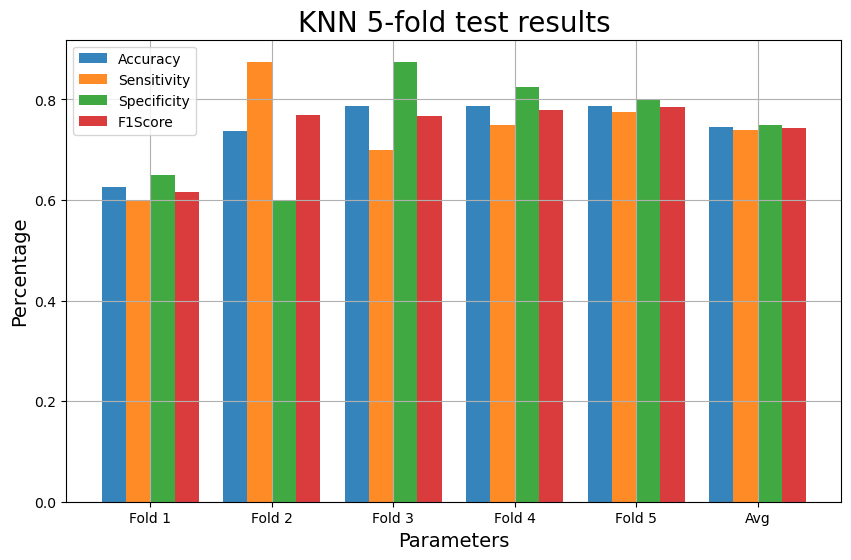

In [82]:
#bar chart for informations
index=np.arange(6)
bar_width=.2

plt.figure(figsize=(10, 6))
k1=plt.bar(index,accuracies,bar_width,alpha=.9,label="Accuracy")
c1=plt.bar(index+bar_width,Sensitivity,bar_width,alpha=.9,label="Sensitivity")
ch1=plt.bar(index+bar_width*2,Specificity,bar_width,alpha=.9,label="Specificity")
f1=plt.bar(index+bar_width*3,F1Score,bar_width,alpha=.9,label="F1Score")

plt.xticks(index+.6/2,('Fold 1','Fold 2','Fold 3','Fold 4','Fold 5','Avg'))
plt.ylabel('Percentage',fontsize=14)
plt.xlabel('Parameters',fontsize=14)
plt.title('KNN 5-fold test results',fontsize=20)
plt.grid(True)
plt.legend()
plt.show()

# 5 Fold Cross Validation AdaBoost 

In [83]:

depressed=mood_data[mood_data['specific_disorder']==1]
healthy=mood_data[mood_data['specific_disorder'].isin([0])]


fold_names = []
accuracies = []
Sensitivity = []
Specificity=[]
F1Score=[]
FPRs = []
cohen_kappas = []
auc_scores = []
    
final_ac=0
final_TPR=0  #Sensitivity, recall
final_TNR=0  # Specifity
final_f1Score=0
final_PPV=0  # Precission
final_FPR=0  
final_cohen_score=0
final_auc_score1=0


for i in range(5):
    fr=(i+1)*40
#     if i==4:
#         fr=fr-1
    #print(fr)
    test_depressed = depressed.iloc[i*40:(i+1)*40, :]
    #test_depressed.head()
    train_depressed = depressed[~depressed.isin(test_depressed)].dropna(how = 'all')
    train_depressed
    test_healthy = healthy.iloc[i*(40):40*(i+1), :]
    #print(19*(i+1))
    #test_depressed.head()
    train_healthy = healthy[~healthy.isin(test_healthy)].dropna(how = 'all')
    train_healthy
    train_all=pd.concat([train_depressed,train_healthy])
    test_all=pd.concat([test_depressed,test_healthy])
    y_train=train_all['specific_disorder']
    x_train=train_all.drop('specific_disorder', axis=1)
    y_test=test_all['specific_disorder']
    x_test=test_all.drop('specific_disorder', axis=1)
    x_train_smt = x_train 
    x_test_smt = x_test
    y_train_smt = y_train 
    y_test_smt  = y_test
    
    from sklearn.ensemble import AdaBoostClassifier
    from sklearn.metrics import accuracy_score

    modelABC = AdaBoostClassifier(random_state = 96)
    modelABC.fit(x_train_smt, y_train_smt)
    #print(modelABC.score(x_test_smt, y_test_smt))

    # Predicting the Test set results
    y_pred = modelABC.predict(x_test_smt)
    ac = accuracy_score(y_test_smt, y_pred)
    print(ac)
    
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report

    y_pred = modelABC.predict(x_test_smt)
    
    from sklearn.metrics import cohen_kappa_score
    cmABC = confusion_matrix(y_test_smt, modelABC.predict(x_test_smt))
    
    TP = cmABC[1,1]  
    TN = cmABC[0,0] 
    FP = cmABC[0,1] 
    FN = cmABC[1,0] 
    
    
    # Sensitivity, hit rate, recall, or true positive rate
    TPR = TP/float(TP+FN)
    # Specificity or true negative rate
    TNR = TN/float(TN+FP) 
    # Precision or positive predictive value
    PPV = TP/float(TP+FP)
    # Negative predictive value
    NPV = TN/float(TN+FN)
    # Fall out or false positive rate
    FPR = FP/float(FP+TN)
    # False negative rate
    FNR = FN/float(TP+FN)
    # False discovery rate
    FDR = FP/float(TP+FP)
    # Accuracy
    totalABC = sum(sum(cmABC))
    Accuracy = (TN+TP)/totalABC

    # MCC
    val = (TP * TN) - (FP * FN)
    MCC_ABC = val / np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))

    # Cohen Kappa
    Y_pred = modelABC.predict(x_test_smt)
    cohen_score = cohen_kappa_score(y_test_smt, Y_pred)
    
    from sklearn.metrics import roc_auc_score
    # predict probabilities
    pred_prob1 = modelABC.predict_proba(x_test_smt)
    pred_prob2 = modelABC.predict_proba(x_test_smt)

    # auc scores
    auc_score1 = roc_auc_score(y_test_smt, pred_prob1[:,1])
    auc_score2 = roc_auc_score(y_test_smt, pred_prob2[:,1])
    
    
    foldNo="fold "+str(i+1)
    final_ac=final_ac+ac
    final_TPR=final_TPR+TPR
    final_TNR=final_TNR+TNR
    final_FPR=final_FPR+FPR
    final_cohen_score=final_cohen_score+cohen_score
    final_auc_score1=final_auc_score1+auc_score1
    f1Score=2*(TPR*PPV)/(TPR+PPV)
    final_f1Score=final_f1Score+f1Score
    fold_names.append(foldNo)
    accuracies.append(ac)
    Sensitivity.append(TPR)
    Specificity.append(TNR)
    F1Score.append(f1Score)
    FPRs.append(FPR)
    cohen_kappas.append(cohen_score)
    auc_scores.append(auc_score1)
    
final_ac=final_ac/5.0
final_TPR=final_TPR/5.0
final_TNR=final_TNR/5.0
final_f1Score=final_f1Score/5.0
final_FPR=final_FPR/5.0
final_cohen_score=final_cohen_score/5.0
final_auc_score1=final_auc_score1/5.0

foldNo="average"
fold_names.append(foldNo)
accuracies.append(final_ac)
Sensitivity.append(final_TPR)
Specificity.append(final_TNR)
F1Score.append(final_f1Score)
FPRs.append(final_FPR)
cohen_kappas.append(final_cohen_score)
auc_scores.append(final_auc_score1)


Performance_Matrix = {
    "AdaBoost": fold_names,
    "Accuracy": accuracies,
    "Sensitivity": Sensitivity,
    "Specificity": Specificity,
    "F1-Score": F1Score,
    "FPR": FPRs,
    #"Cohen's Kappa": cohen_kappas,
   # "AUC": auc_scores
    # Add more key-value pairs for other metrics if needed
}


Performance_Matrix = pd.DataFrame(Performance_Matrix)
Performance_Matrix


0.8875
0.825
0.875
0.7625
0.9


,AdaBoost,Accuracy,Sensitivity,Specificity,F1-Score,FPR
0,fold 1,0.8875,0.925,0.850,0.891566,0.150
1,fold 2,0.8250,0.850,0.800,0.829268,0.200
2,fold 3,0.8750,0.825,0.925,0.868421,0.075
3,fold 4,0.7625,0.700,0.825,0.746667,0.175
4,fold 5,0.9000,0.875,0.925,0.897436,0.075
5,average,0.8500,0.835,0.865,0.846672,0.135


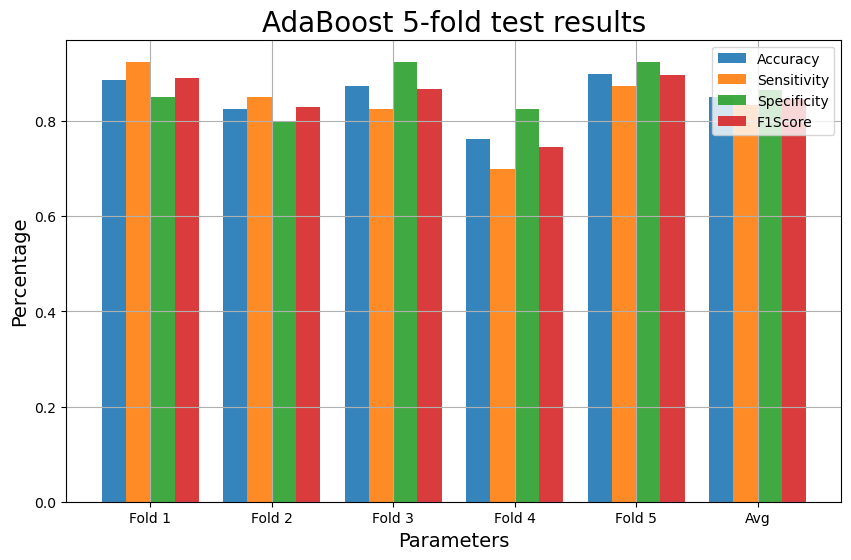

In [84]:
#bar chart for informations
index=np.arange(6)
bar_width=.2

plt.figure(figsize=(10, 6))
k1=plt.bar(index,accuracies,bar_width,alpha=.9,label="Accuracy")
c1=plt.bar(index+bar_width,Sensitivity,bar_width,alpha=.9,label="Sensitivity")
ch1=plt.bar(index+bar_width*2,Specificity,bar_width,alpha=.9,label="Specificity")
f1=plt.bar(index+bar_width*3,F1Score,bar_width,alpha=.9,label="F1Score")

plt.xticks(index+.6/2,('Fold 1','Fold 2','Fold 3','Fold 4','Fold 5','Avg'))
plt.ylabel('Percentage',fontsize=14)
plt.xlabel('Parameters',fontsize=14)
plt.title('AdaBoost 5-fold test results',fontsize=20)
plt.grid(True)
plt.legend()
plt.show()

# 5 Fold Cross Validation XGBoost

In [85]:

depressed=mood_data[mood_data['specific_disorder']==1]
healthy=mood_data[mood_data['specific_disorder'].isin([0])]

fold_names = []
accuracies = []
Sensitivity = []
Specificity=[]
F1Score=[]
FPRs = []
cohen_kappas = []
auc_scores = []
    
final_ac=0
final_TPR=0  #Sensitivity, recall
final_TNR=0  # Specifity
final_f1Score=0
final_PPV=0  # Precission
final_FPR=0  
final_cohen_score=0
final_auc_score1=0


for i in range(5):
    fr=(i+1)*40
#     if i==4:
#         fr=fr-1
    #print(fr)
    test_depressed = depressed.iloc[i*40:(i+1)*40, :]
    #test_depressed.head()
    train_depressed = depressed[~depressed.isin(test_depressed)].dropna(how = 'all')
    train_depressed
    test_healthy = healthy.iloc[i*(40):40*(i+1), :]
    #print(19*(i+1))
    #test_depressed.head()
    train_healthy = healthy[~healthy.isin(test_healthy)].dropna(how = 'all')
    train_healthy
    train_all=pd.concat([train_depressed,train_healthy])
    test_all=pd.concat([test_depressed,test_healthy])
    y_train=train_all['specific_disorder']
    x_train=train_all.drop('specific_disorder', axis=1)
    y_test=test_all['specific_disorder']
    x_test=test_all.drop('specific_disorder', axis=1)
    x_train_smt = x_train 
    x_test_smt = x_test
    y_train_smt = y_train 
    y_test_smt  = y_test
    
    # Training the Naive Bayes model on the Training set
    #conda install -c anaconda py-xgboost
    #!pip install xgboost
    import xgboost as xgb
    from sklearn.metrics import accuracy_score

    modelXGB = xgb.XGBClassifier()

    modelXGB.fit(x_train_smt, y_train_smt)
    #print('Training',modelXGB.score(x_train_smt, y_train_smt))
    # Predicting the Test set results
    y_pred = modelXGB.predict(x_test_smt)
    ac = accuracy_score(y_test_smt, y_pred)
    print('Testing',ac)
    cm = confusion_matrix(y_test_smt, y_pred)
    cm
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report
    y_pred = modelXGB.predict(x_test_smt)
    
    from sklearn.metrics import cohen_kappa_score
    cmGNB = confusion_matrix(y_test_smt, modelXGB.predict(x_test_smt))
    TP = cmGNB[1,1]  
    TN = cmGNB[0,0] 
    FP = cmGNB[0,1] 
    FN = cmGNB[1,0] 
    
    
    # Sensitivity, hit rate, recall, or true positive rate
    TPR = TP/float(TP+FN)
    # Specificity or true negative rate
    TNR = TN/float(TN+FP) 
    # Precision or positive predictive value
    PPV = TP/float(TP+FP)
    # Negative predictive value
    NPV = TN/float(TN+FN)
    # Fall out or false positive rate
    FPR = FP/float(FP+TN)
    # False negative rate
    FNR = FN/float(TP+FN)
    # False discovery rate
    FDR = FP/float(TP+FP)
    # Accuracy
    totalGNB=sum(sum(cmGNB))
    Accuracy = (TN+TP)/totalGNB
    # MCC
    val = (TP * TN) - (FP * FN)
    MCC_GNB = val / np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))
    # Cohen Kappa
    Y_pred = modelXGB.predict(x_test_smt)
    cohen_score = cohen_kappa_score(y_test_smt, Y_pred)

    from sklearn.metrics import roc_auc_score

    # predict probabilities
    pred_prob1 = modelXGB.predict_proba(x_test_smt)
    pred_prob2 = modelXGB.predict_proba(x_test_smt)

    # auc scores
    auc_score1 = roc_auc_score(y_test_smt, pred_prob1[:,1])
    auc_score2 = roc_auc_score(y_test_smt, pred_prob2[:,1])
    
    foldNo="fold "+str(i+1)
    final_ac=final_ac+ac
    final_TPR=final_TPR+TPR
    final_TNR=final_TNR+TNR
    final_FPR=final_FPR+FPR
    final_cohen_score=final_cohen_score+cohen_score
    final_auc_score1=final_auc_score1+auc_score1
    f1Score=2*(TPR*PPV)/(TPR+PPV)
    final_f1Score=final_f1Score+f1Score
    fold_names.append(foldNo)
    accuracies.append(ac)
    Sensitivity.append(TPR)
    Specificity.append(TNR)
    F1Score.append(f1Score)
    FPRs.append(FPR)
    cohen_kappas.append(cohen_score)
    auc_scores.append(auc_score1)
    
final_ac=final_ac/5.0
final_TPR=final_TPR/5.0
final_TNR=final_TNR/5.0
final_f1Score=final_f1Score/5.0
final_FPR=final_FPR/5.0
final_cohen_score=final_cohen_score/5.0
final_auc_score1=final_auc_score1/5.0

foldNo="average"
fold_names.append(foldNo)
accuracies.append(final_ac)
Sensitivity.append(final_TPR)
Specificity.append(final_TNR)
F1Score.append(final_f1Score)
FPRs.append(final_FPR)
cohen_kappas.append(final_cohen_score)
auc_scores.append(final_auc_score1)


Performance_Matrix = {
    "XGBoost": fold_names,
    "Accuracy": accuracies,
    "Sensitivity": Sensitivity,
    "Specificity": Specificity,
    "F1-Score": F1Score,
    "FPR": FPRs,
    #"Cohen's Kappa": cohen_kappas,
   # "AUC": auc_scores
    # Add more key-value pairs for other metrics if needed
}



Performance_Matrix = pd.DataFrame(Performance_Matrix)
Performance_Matrix


Testing 0.8875
Testing 0.8875
Testing 0.9375
Testing 0.8625
Testing 0.925


,XGBoost,Accuracy,Sensitivity,Specificity,F1-Score,FPR
0,fold 1,0.8875,0.900,0.875,0.888889,0.125
1,fold 2,0.8875,0.925,0.850,0.891566,0.150
2,fold 3,0.9375,0.925,0.950,0.936709,0.050
3,fold 4,0.8625,0.850,0.875,0.860759,0.125
4,fold 5,0.9250,0.875,0.975,0.921053,0.025
5,average,0.9000,0.895,0.905,0.899795,0.095


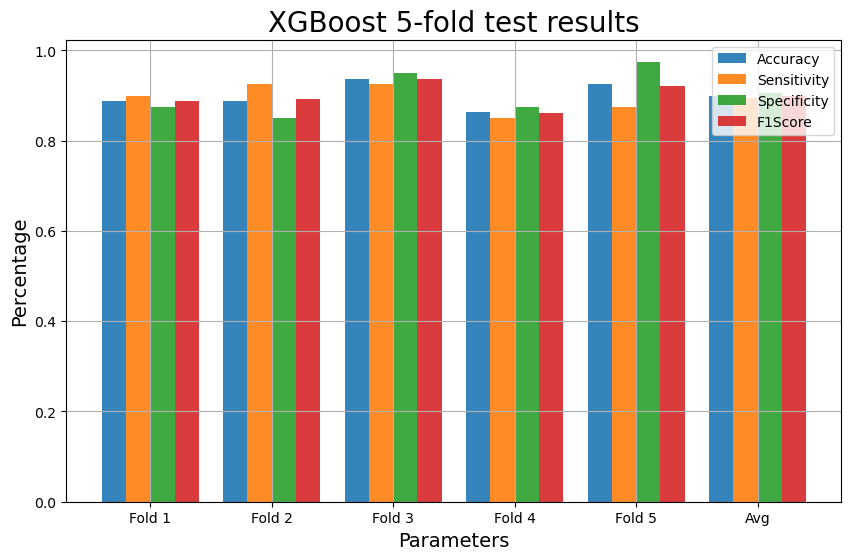

In [86]:
#bar chart for informations
index=np.arange(6)
bar_width=.2

plt.figure(figsize=(10, 6))
k1=plt.bar(index,accuracies,bar_width,alpha=.9,label="Accuracy")
c1=plt.bar(index+bar_width,Sensitivity,bar_width,alpha=.9,label="Sensitivity")
ch1=plt.bar(index+bar_width*2,Specificity,bar_width,alpha=.9,label="Specificity")
f1=plt.bar(index+bar_width*3,F1Score,bar_width,alpha=.9,label="F1Score")

plt.xticks(index+.6/2,('Fold 1','Fold 2','Fold 3','Fold 4','Fold 5','Avg'))
plt.ylabel('Percentage',fontsize=14)
plt.xlabel('Parameters',fontsize=14)
plt.title('XGBoost 5-fold test results',fontsize=20)
plt.grid(True)
plt.legend()
plt.show()

In [87]:
#Task 
# accuracy, Sensitivity, Specificity, F1 Score